In [5]:
import pickle
from neuron_visualization.NeuronVisualizer import NeuronVisualizer
import pandas as pd

with open("models/rnn_tr_model.pkl", "rb") as f:
    model = pickle.load(f)
model.set_device("cpu")
visualizer = NeuronVisualizer(model)
data = pd.read_csv("data/triangle_data1000_50steps.csv")
# data = data[data['run_id'].isin([0, 1])]
print(data.shape)
visualizer.retrieve_activations(data, use_predicted=True)


(36300, 11)


100%|██████████| 1000/1000 [00:12<00:00, 81.53it/s]


100%|██████████| 100/100 [00:02<00:00, 35.47it/s]


Cluster 0: [ 3  7 11 12 13 14 15 20 23 27 29 39 40 42 43 44 47 48 50 64 77 81 82 83
 85 88 89]


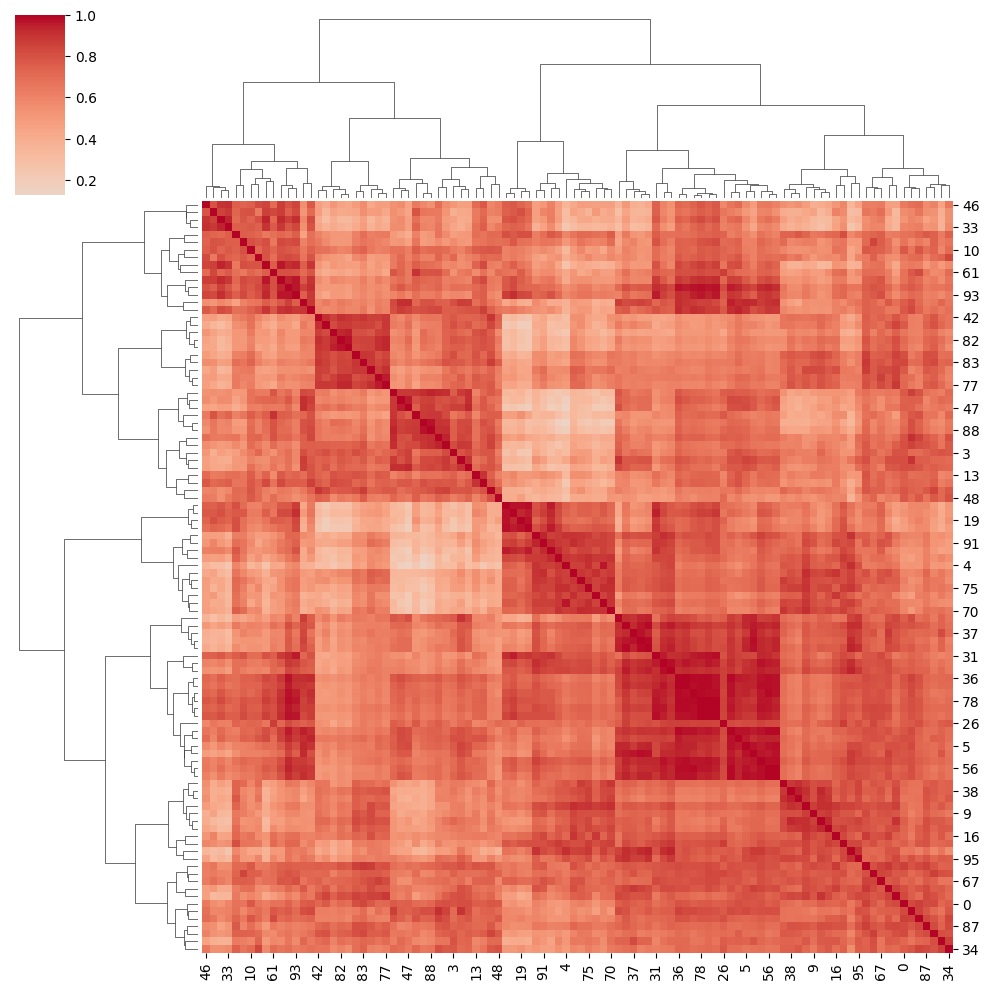

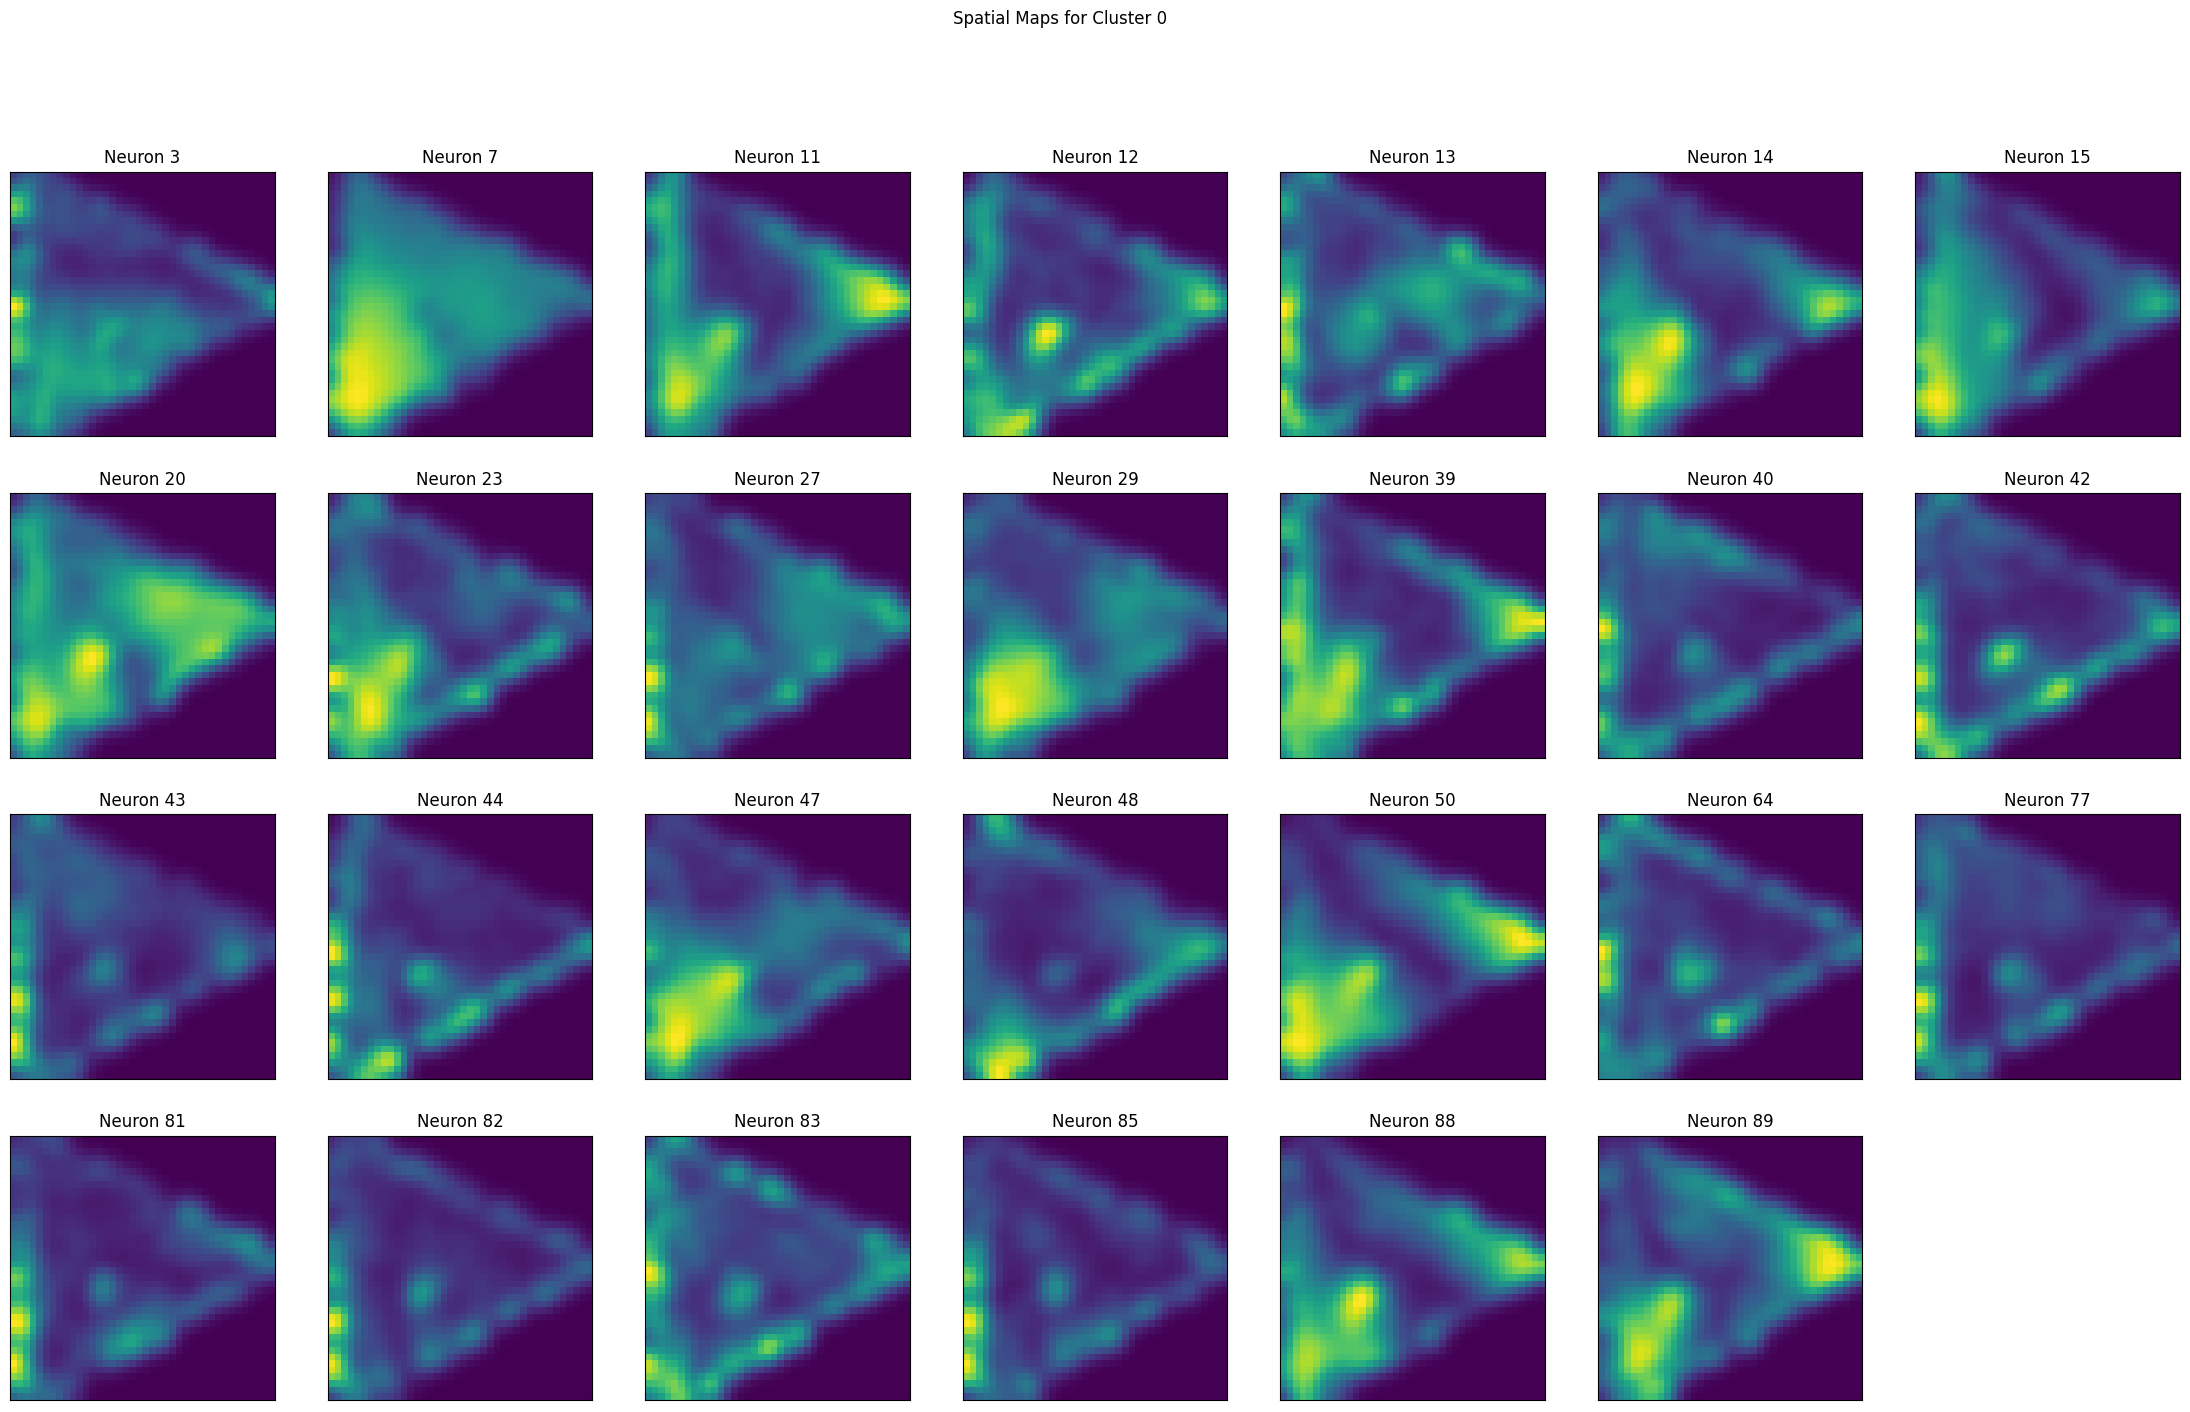

Cluster 1: [ 0  5  6  8 17 26 28 30 31 34 35 36 37 45 49 51 55 56 57 58 59 62 63 67
 68 72 74 76 78 79 80 84 87 90 95 97 99]


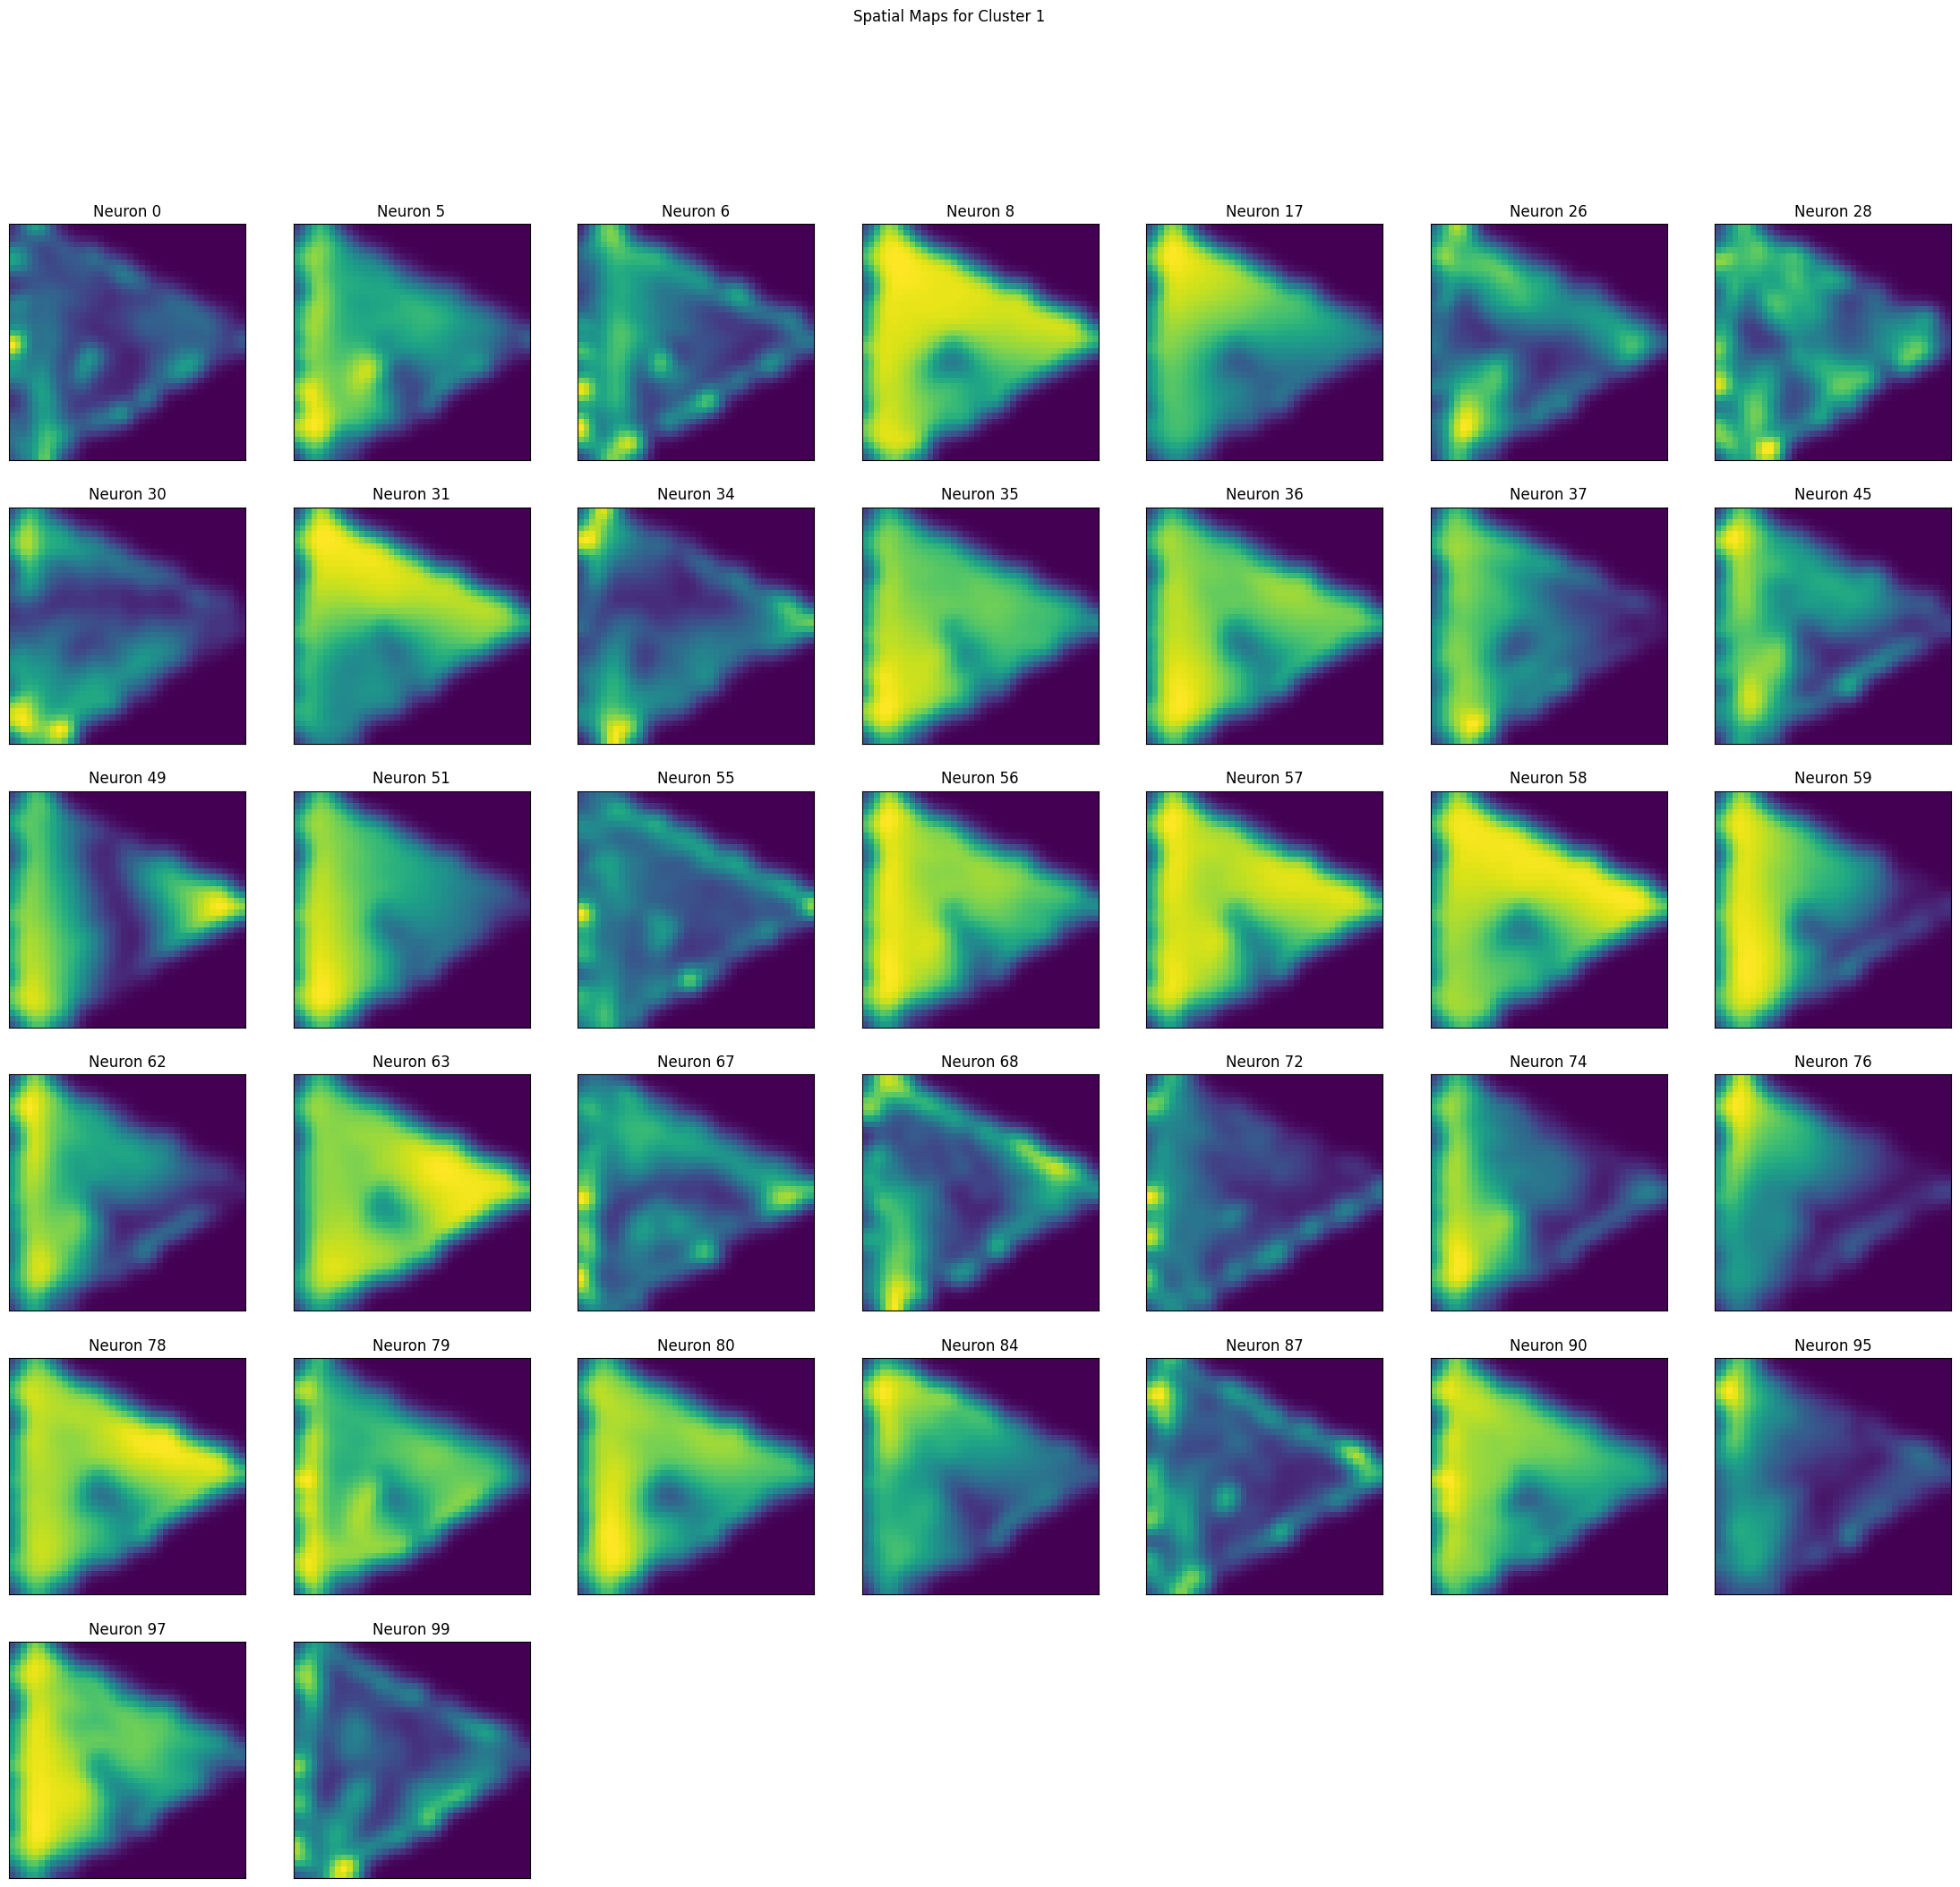

Cluster 2: [ 2 10 24 33 46 53 61 65 66 71 93 96]


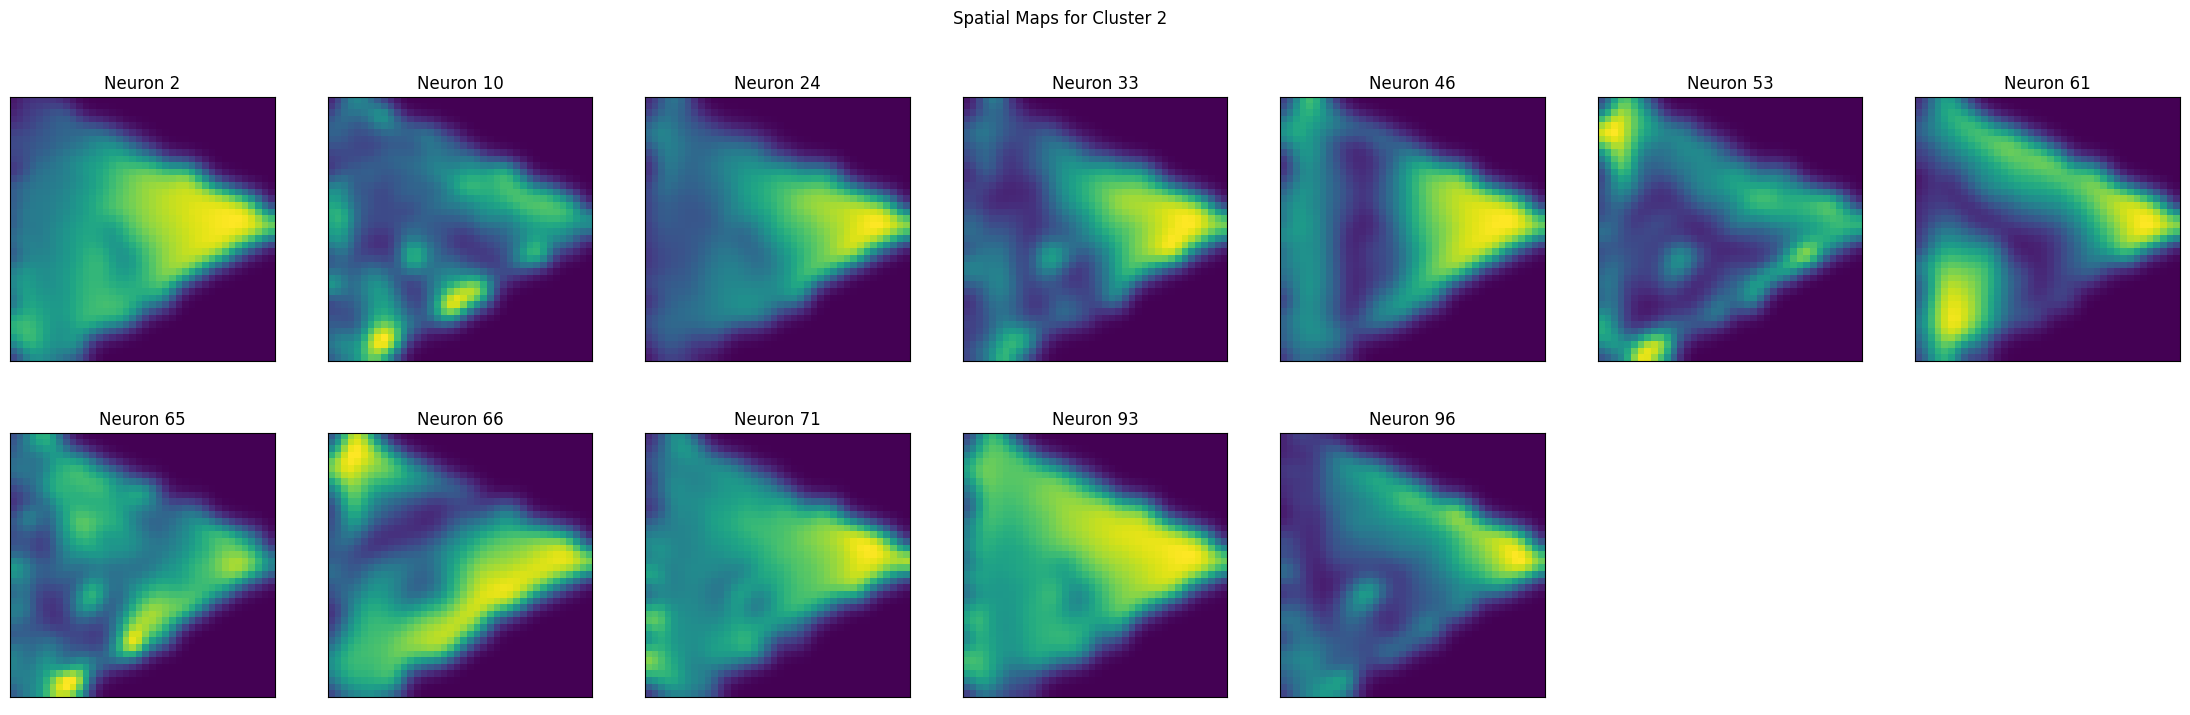

Cluster 3: [ 1  4  9 16 18 21 22 25 32 38 41 54 69 70 73 75 91 92 94 98]


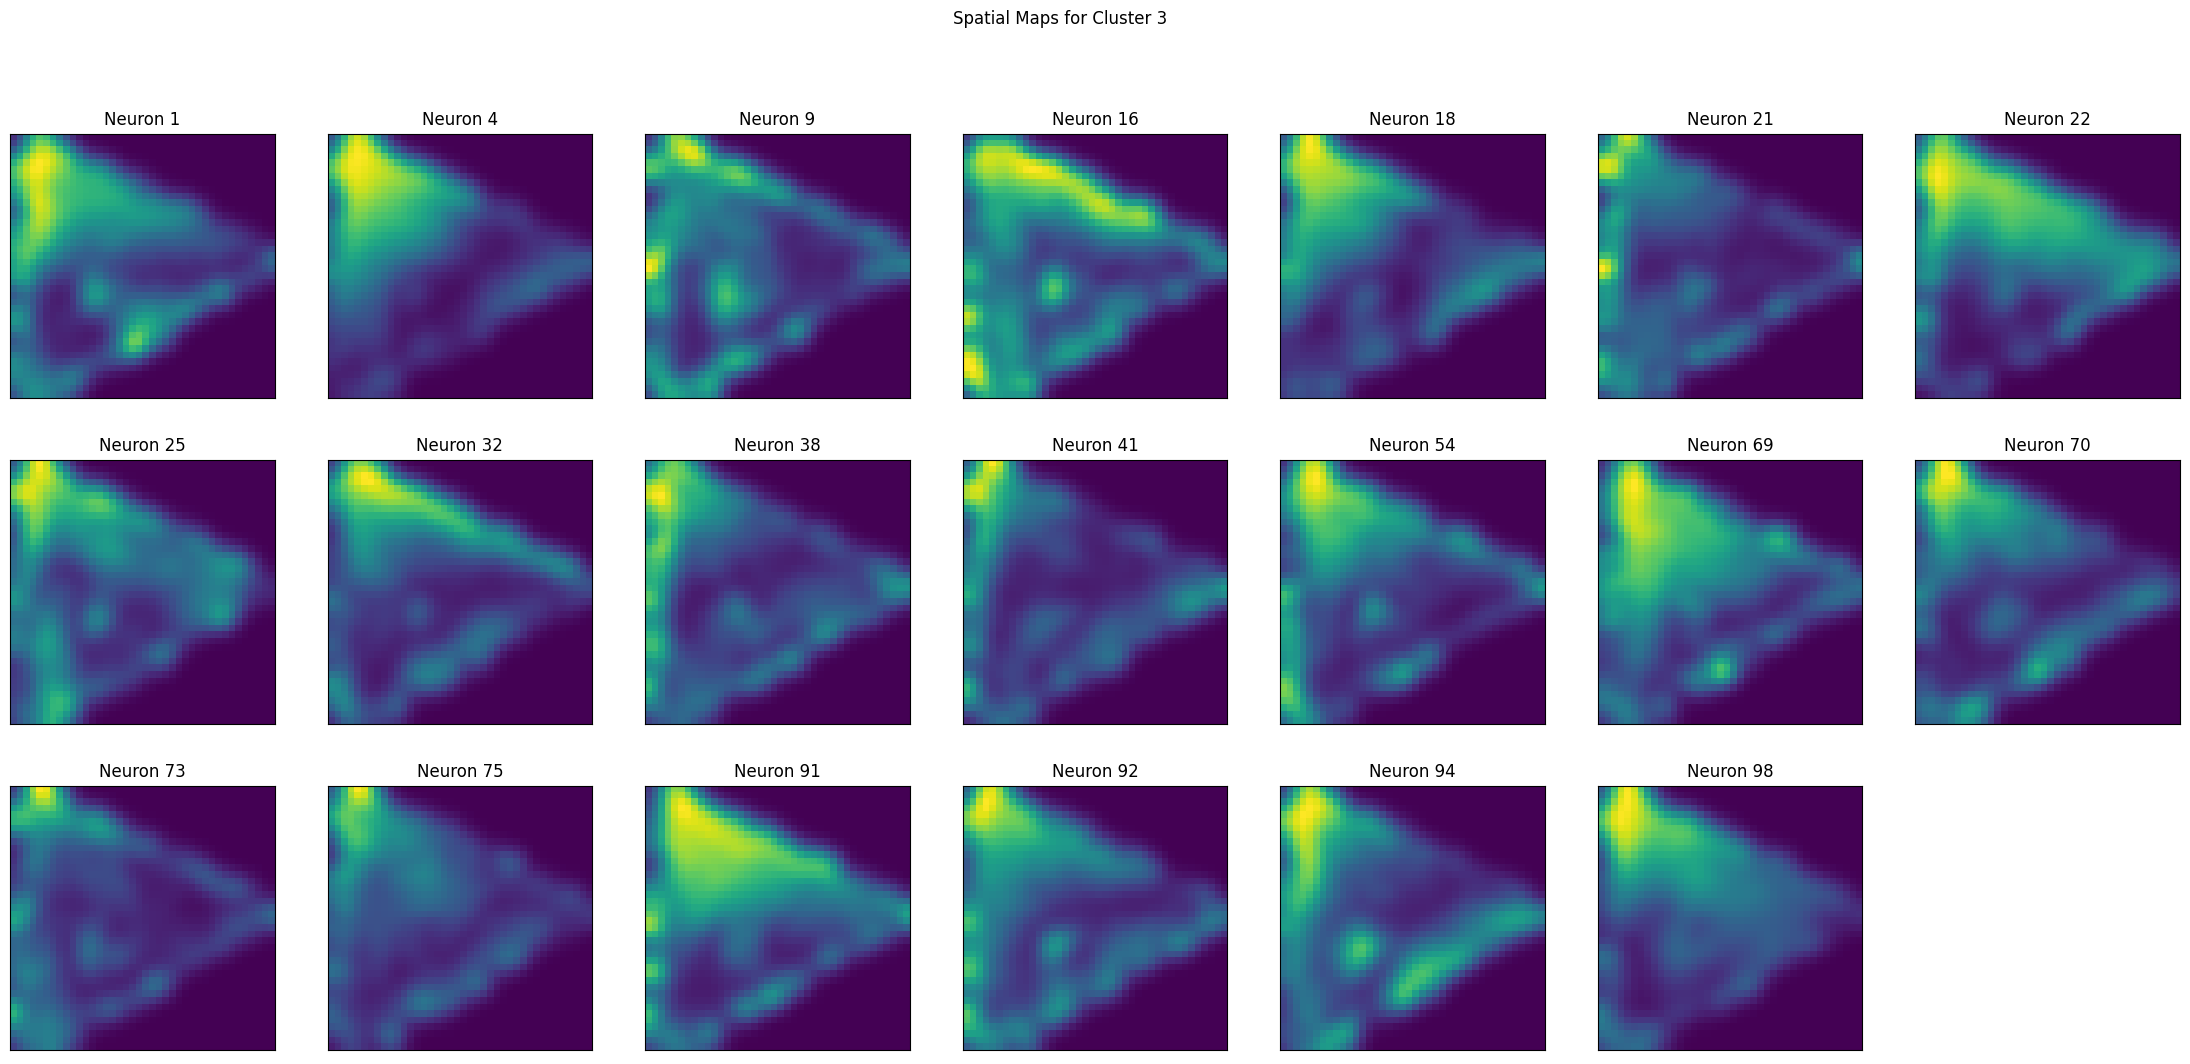

Cluster 4: [19 52 60 86]


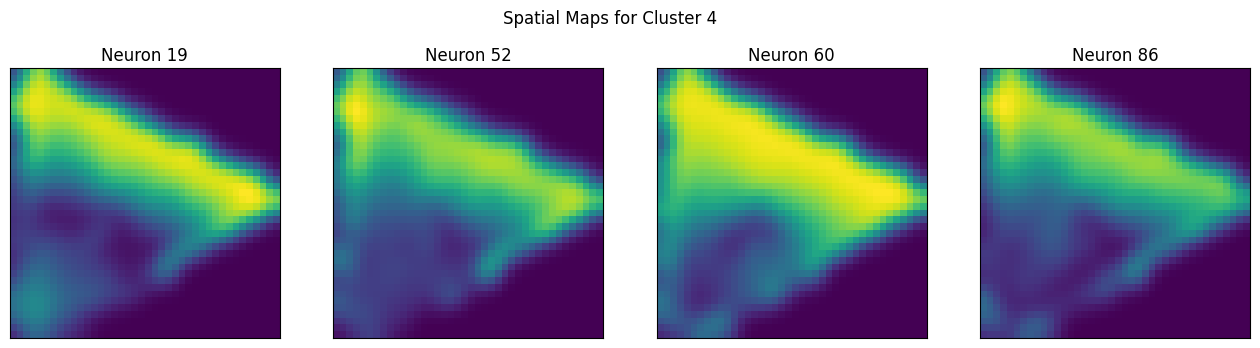

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from utils.plots import smart_subplots
maps = visualizer.get_spatial_maps(absolute=True)
cos_sims = visualizer.compute_cos_sim_on_maps(maps)
# plt.imshow(cos_sims, cmap='bwr', vmin=-1, vmax=1)
# plt.colorbar()
# plt.title("Cosine similarity between spatial maps of different neurons")
# plt.show()
import seaborn as sns
import scipy.cluster.hierarchy as sch

linkage = sch.linkage(1 - cos_sims, method='ward')
sns.clustermap(cos_sims, row_linkage=linkage, col_linkage=linkage, cmap='coolwarm', center=0)

# cluster the resulting cells into 5 clusters
from sklearn.cluster import AgglomerativeClustering
num_clusters = 5
clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')
labels = clustering.fit_predict(1 - cos_sims)
for cluster_id in range(num_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]
    print(f"Cluster {cluster_id}: {cluster_indices}")
    fig, axes = smart_subplots(len(cluster_indices), 7)
    axes = np.array(axes).ravel()
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    for i, neuron_idx in enumerate(cluster_indices):
        axes[i].imshow(maps[neuron_idx], cmap='viridis')
        axes[i].set_title(f'Neuron {neuron_idx}')
    plt.suptitle(f'Spatial Maps for Cluster {cluster_id}')
    plt.show()

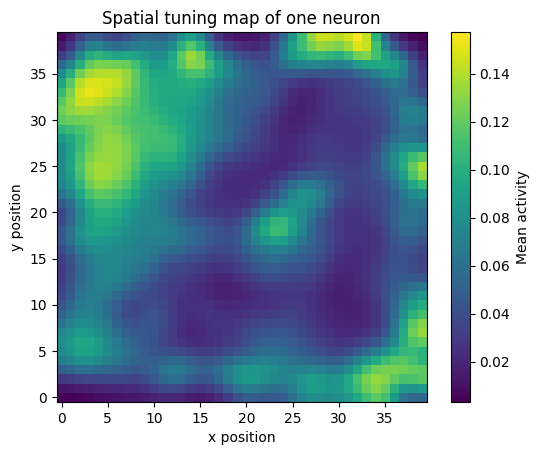

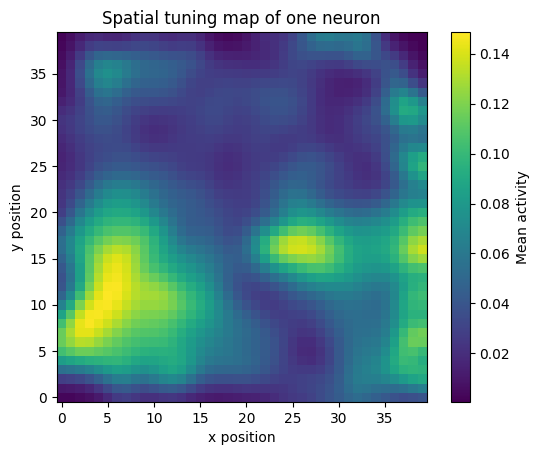

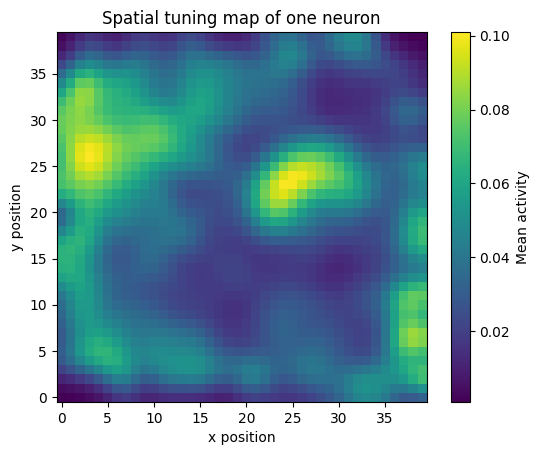

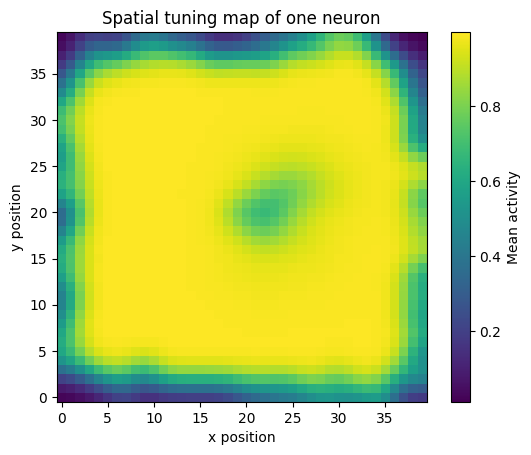

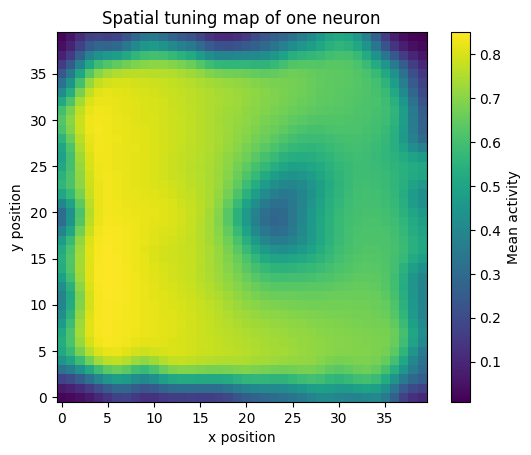

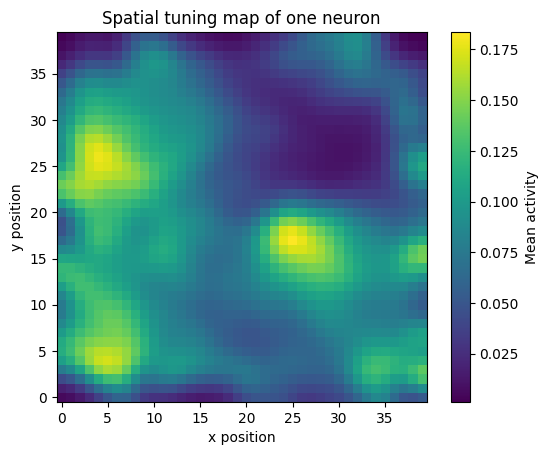

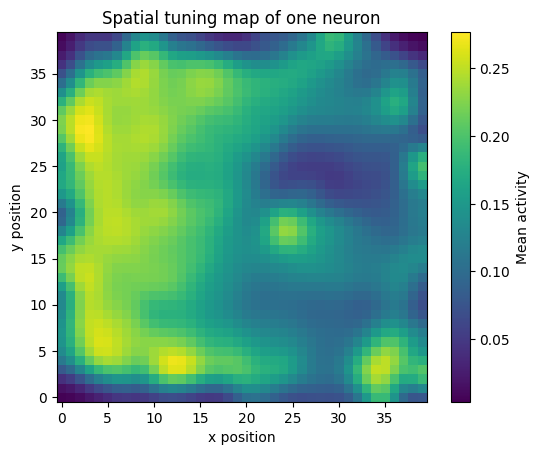

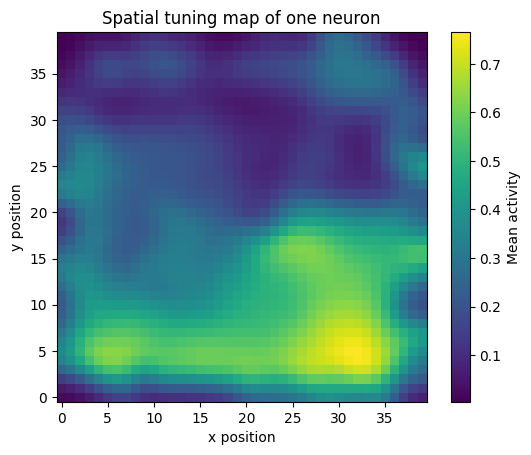

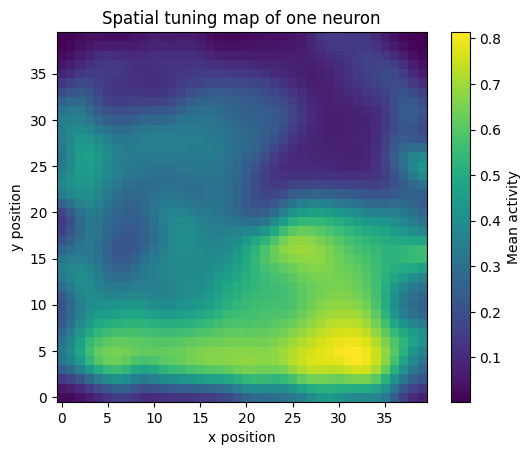

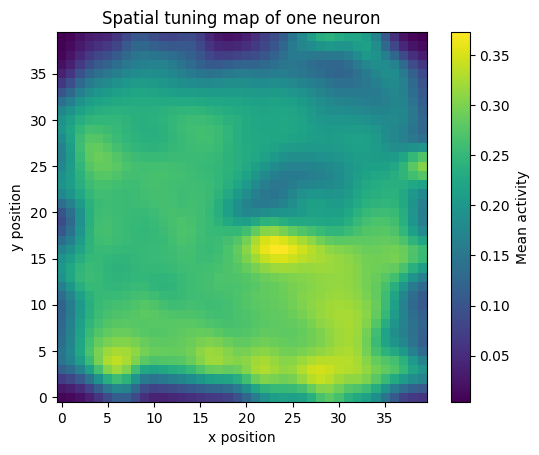

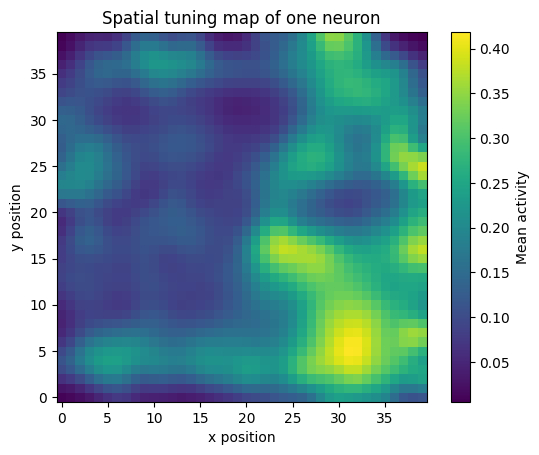

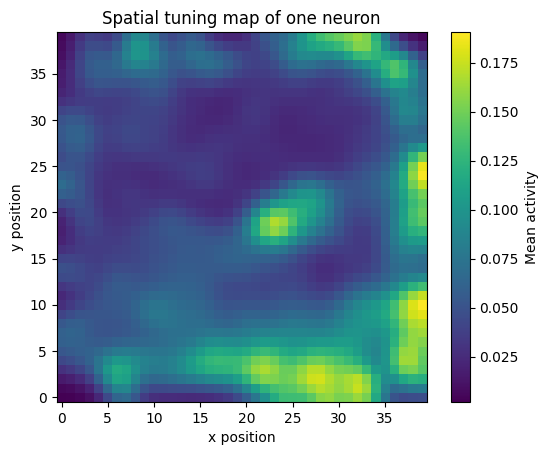

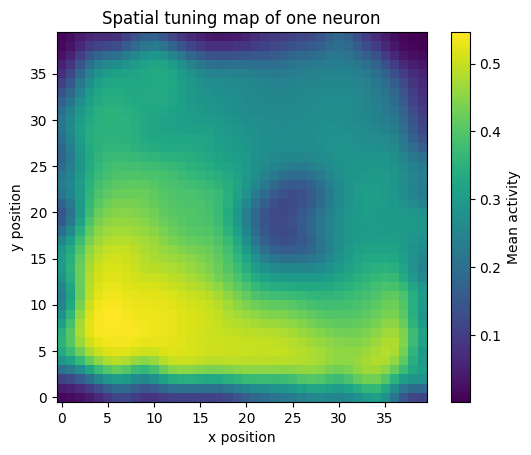

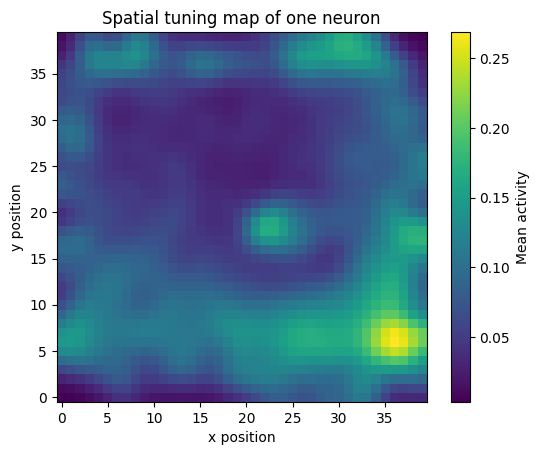

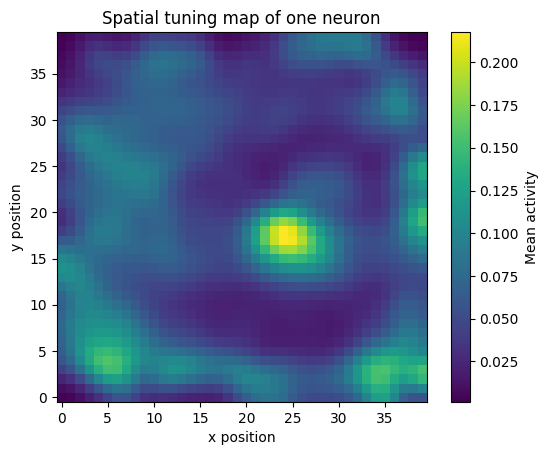

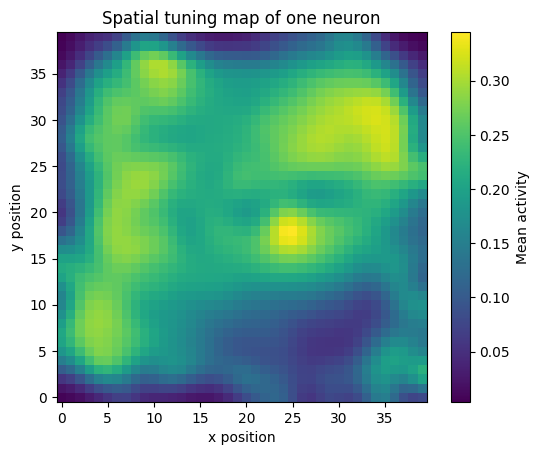

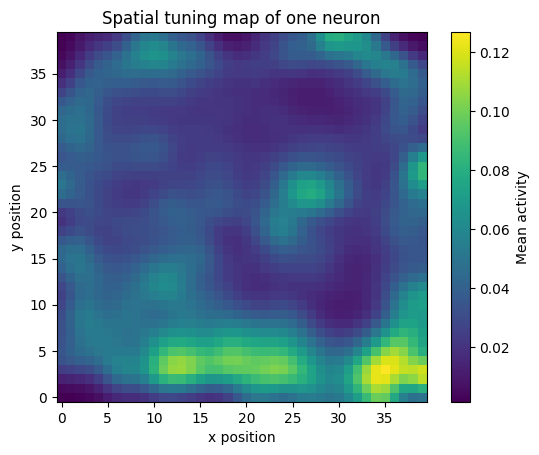

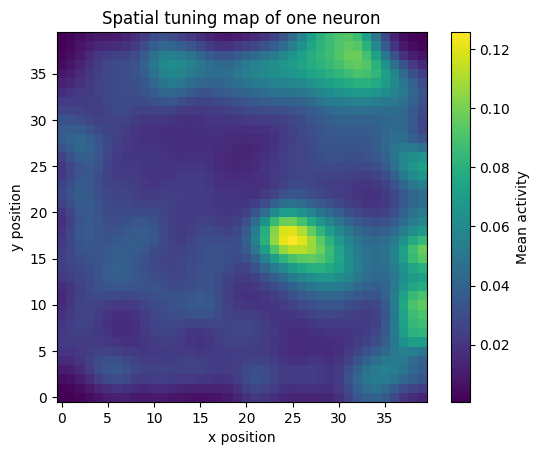

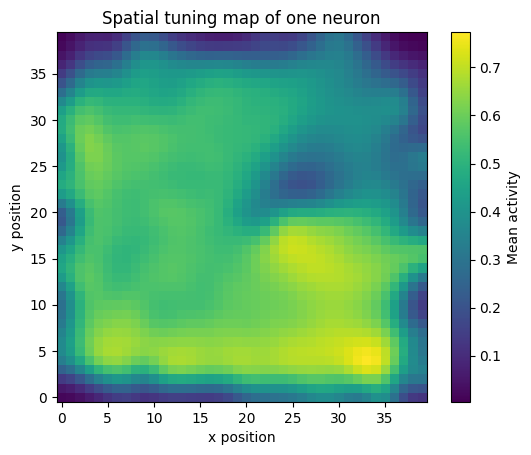

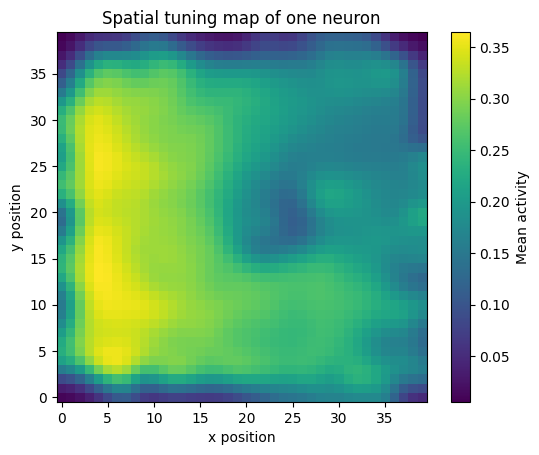

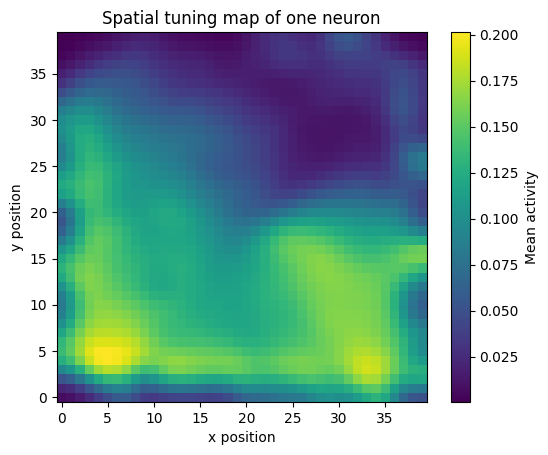

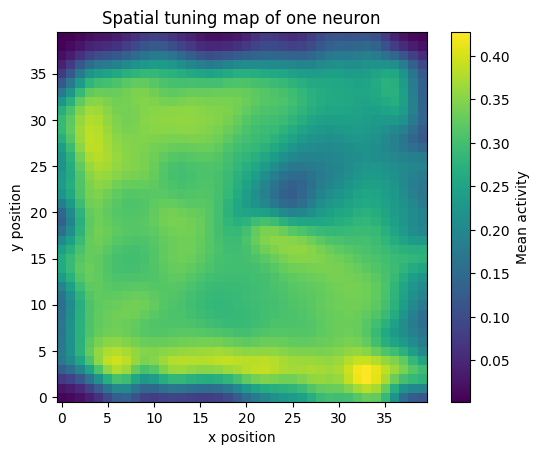

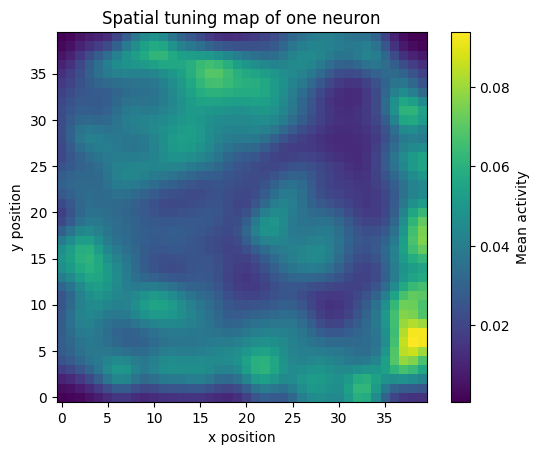

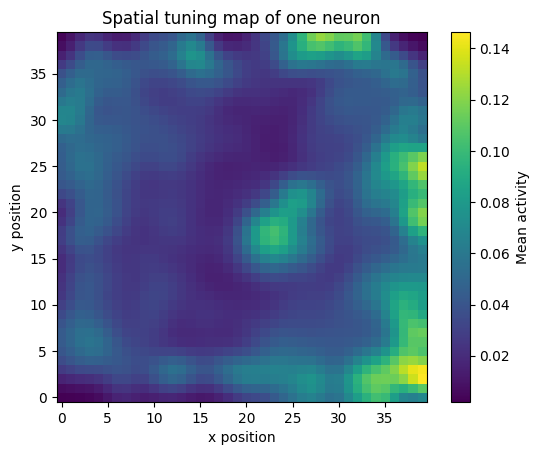

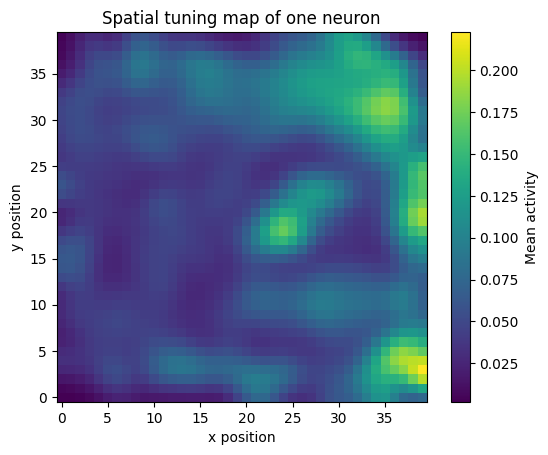

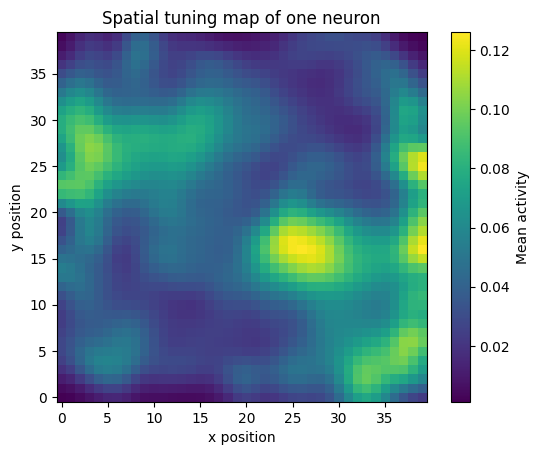

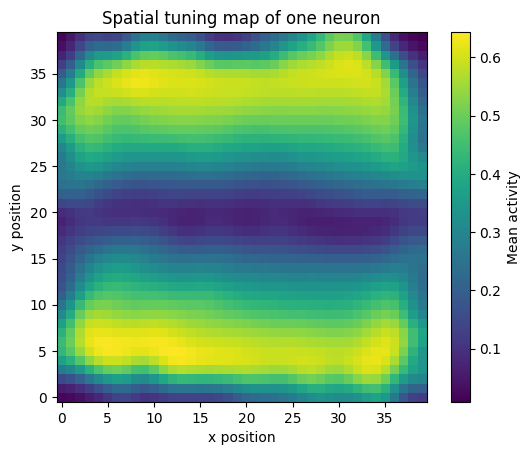

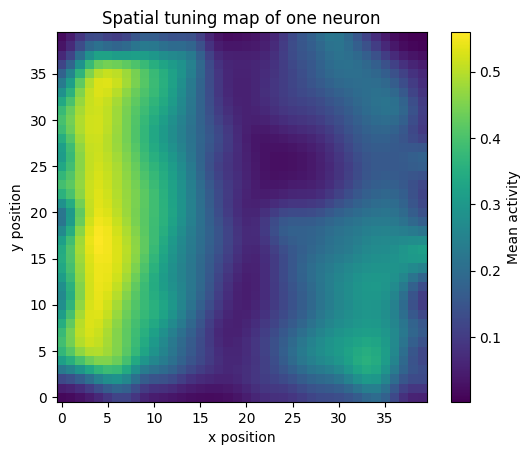

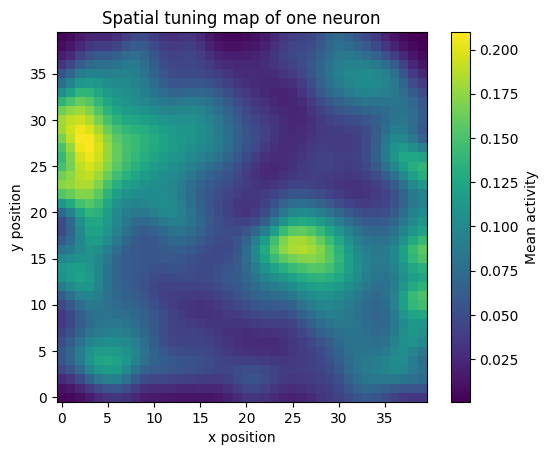

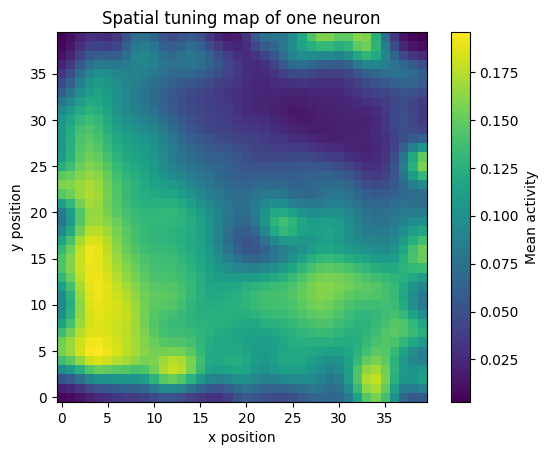

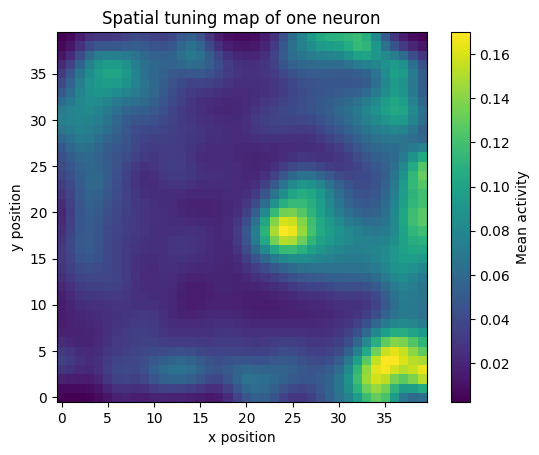

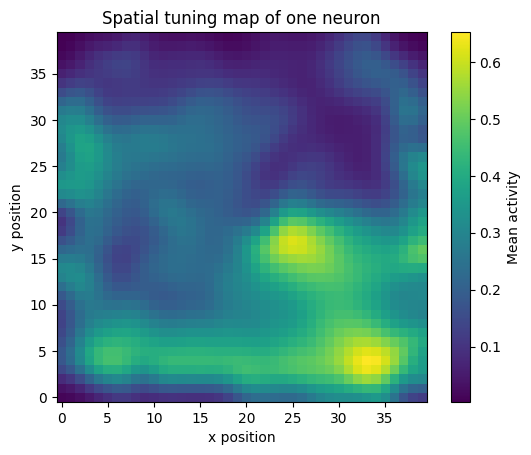

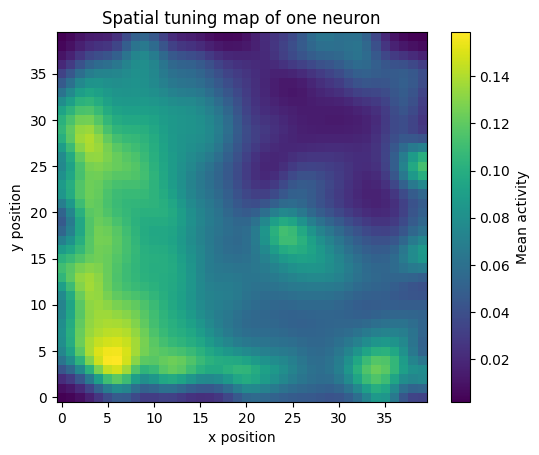

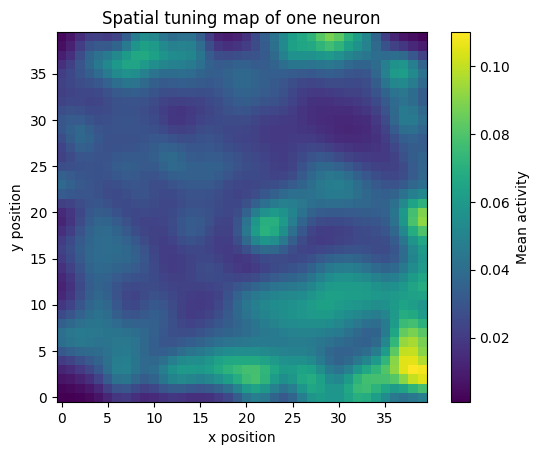

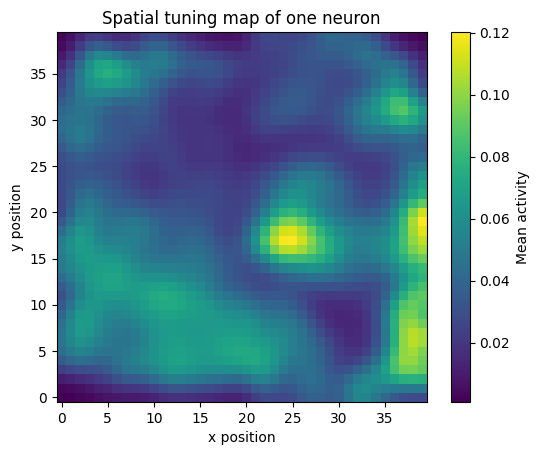

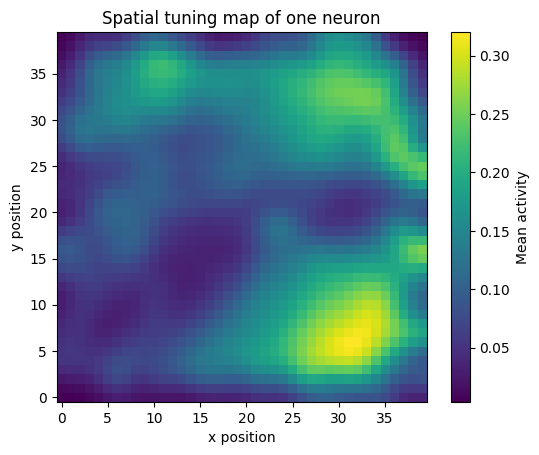

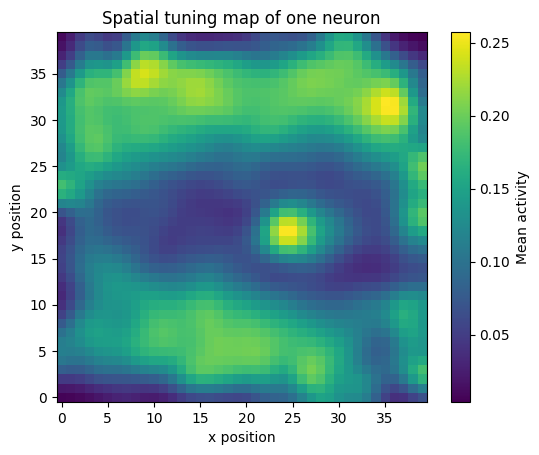

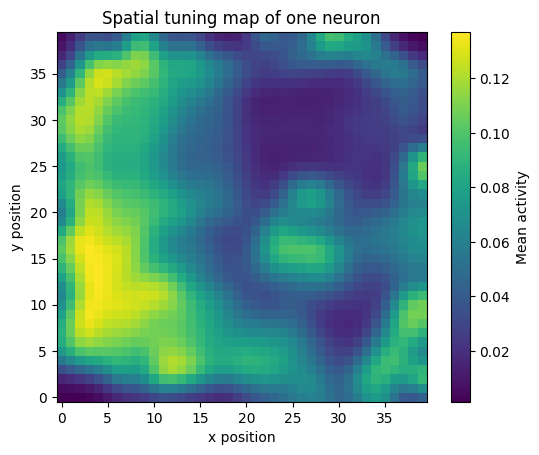

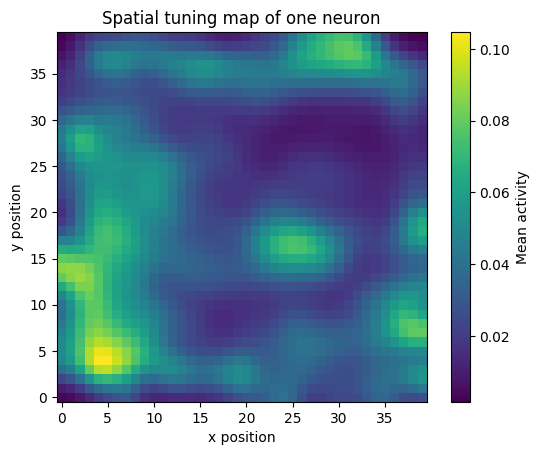

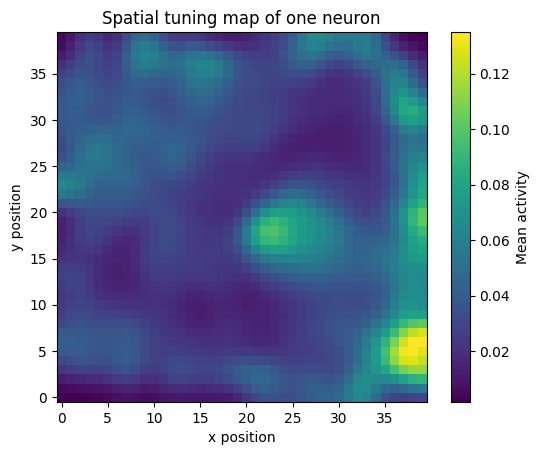

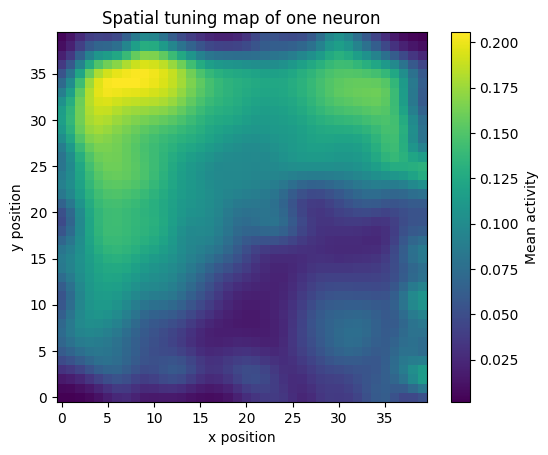

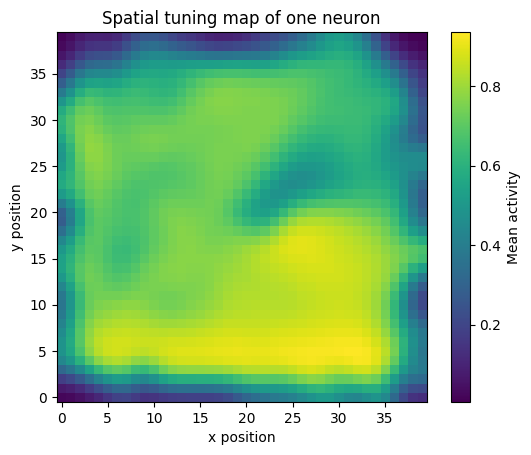

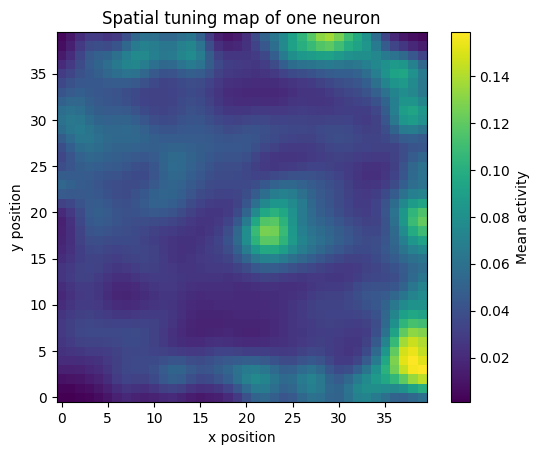

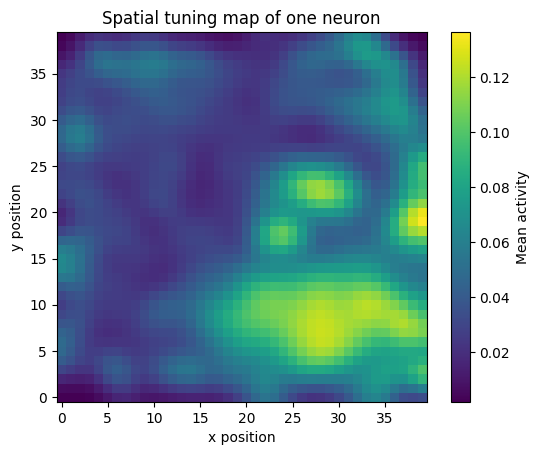

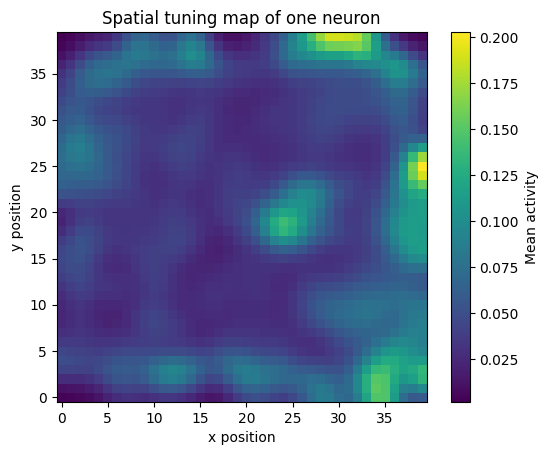

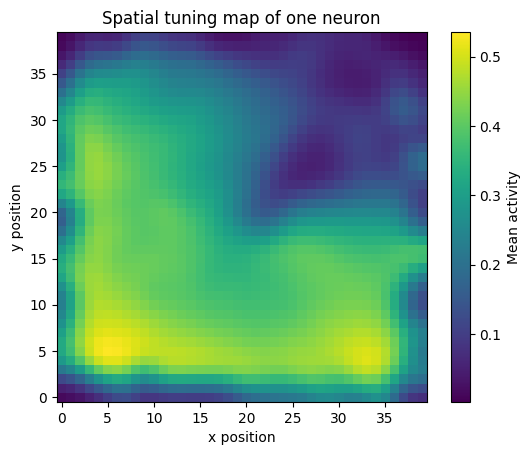

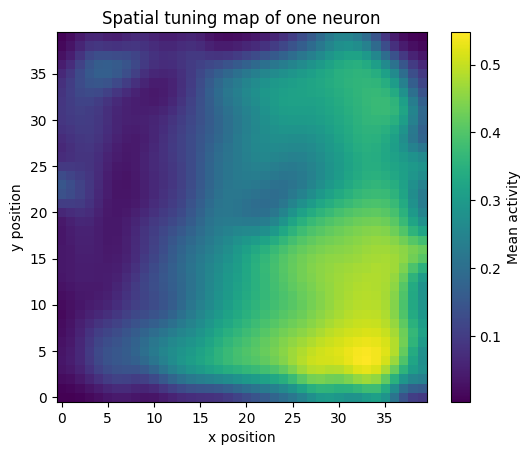

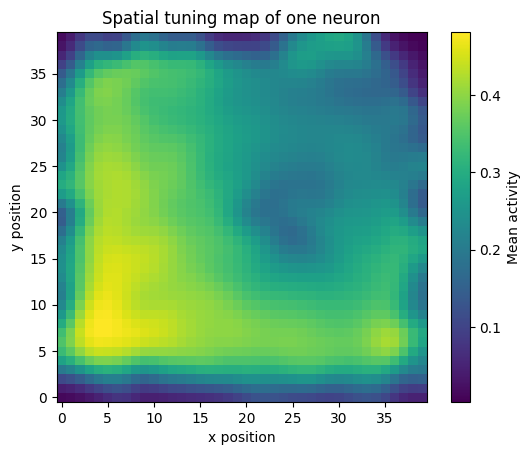

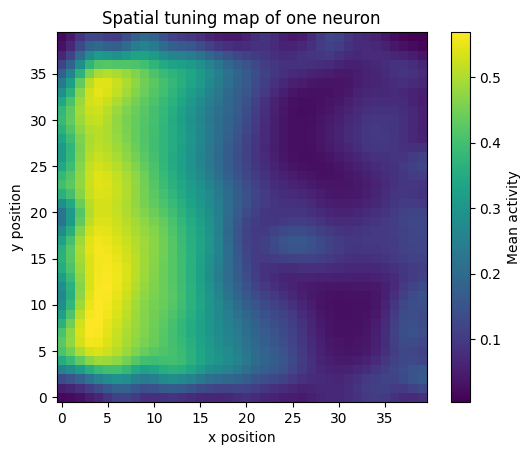

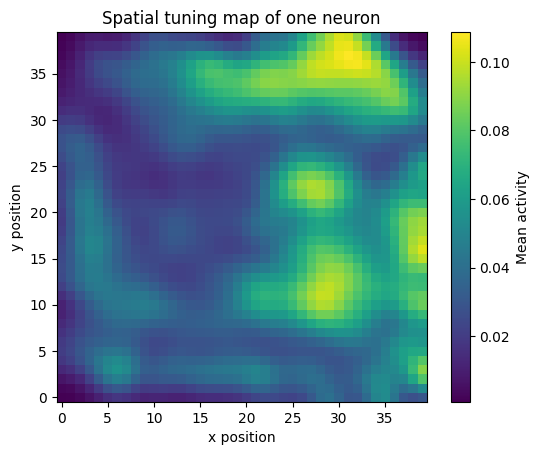

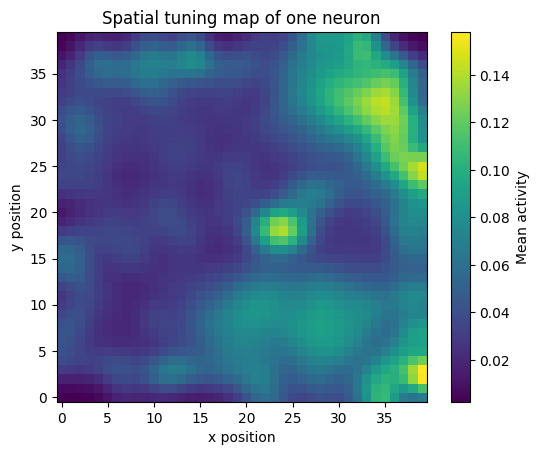

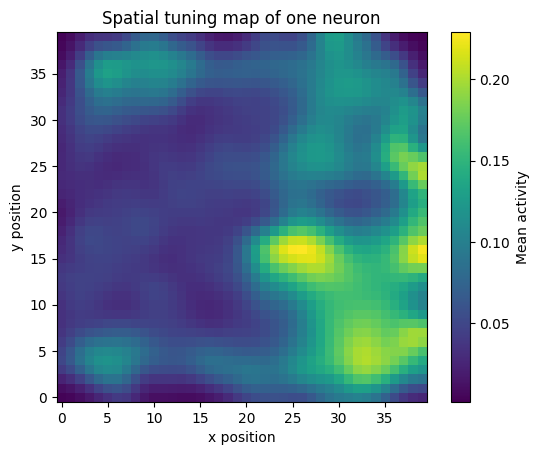

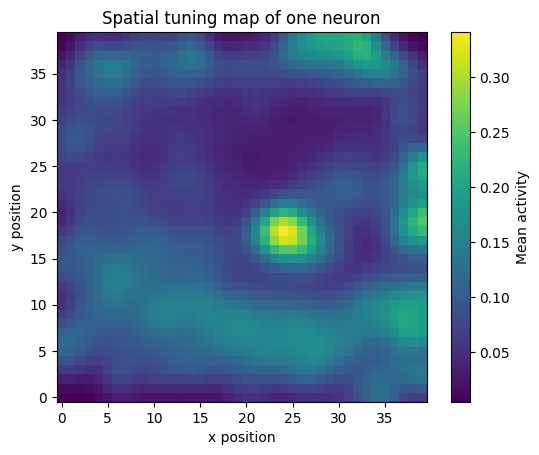

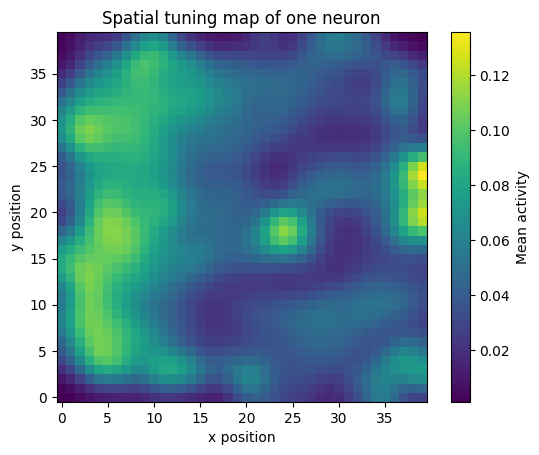

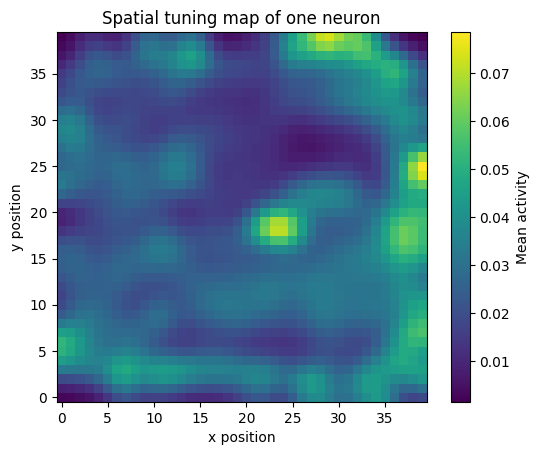

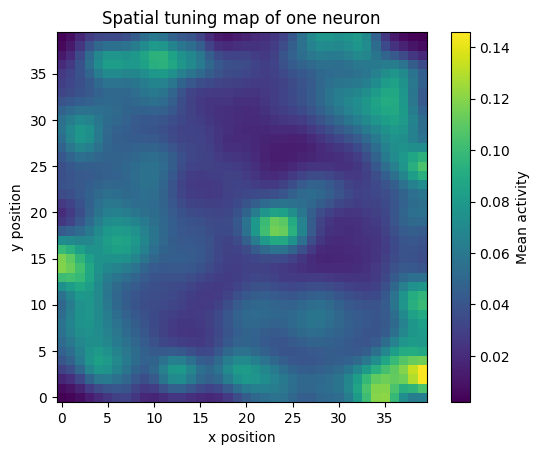

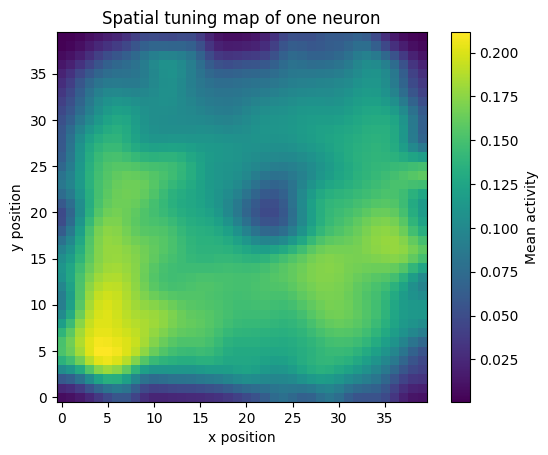

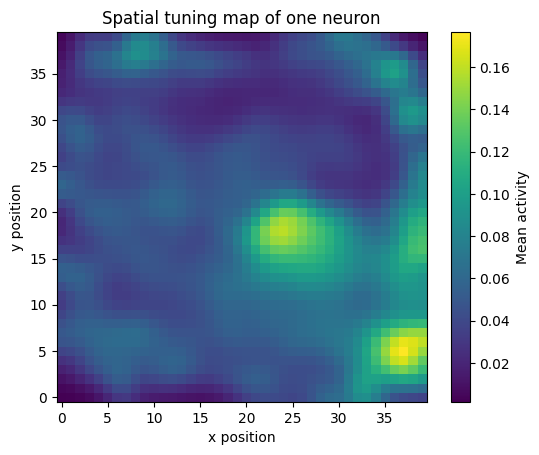

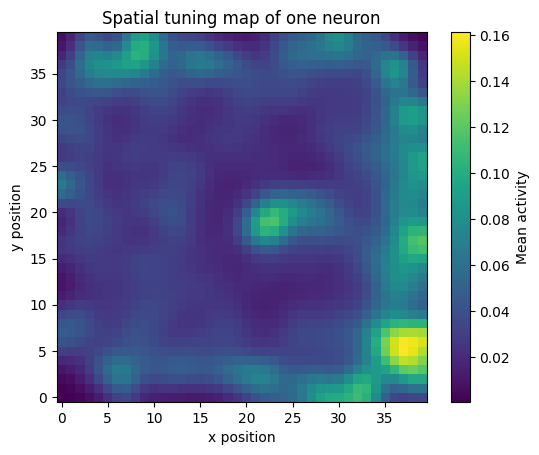

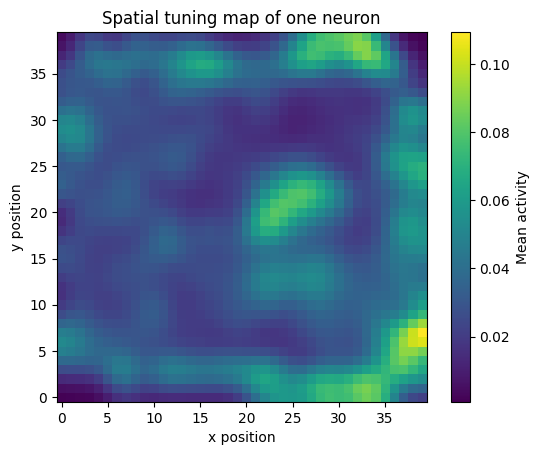

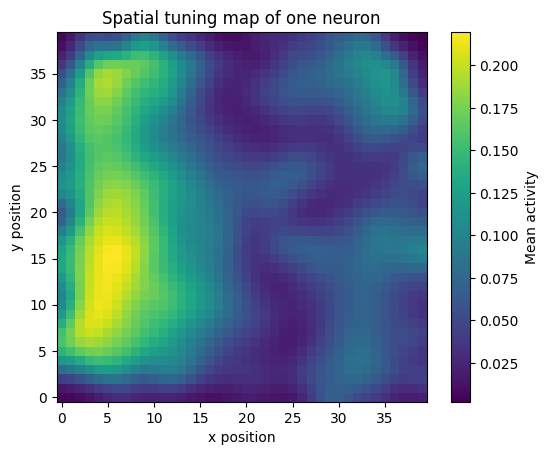

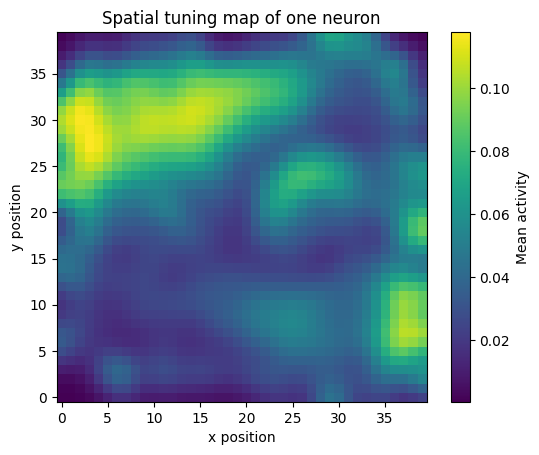

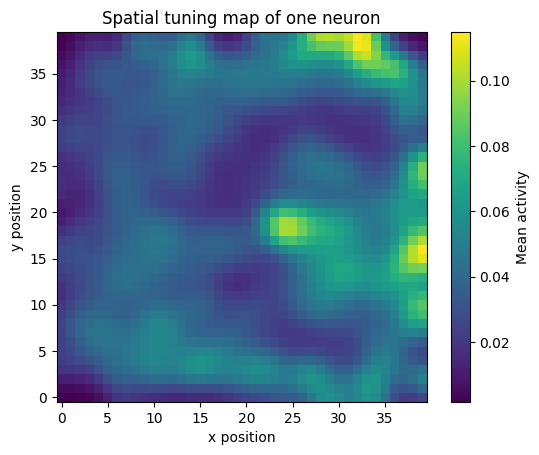

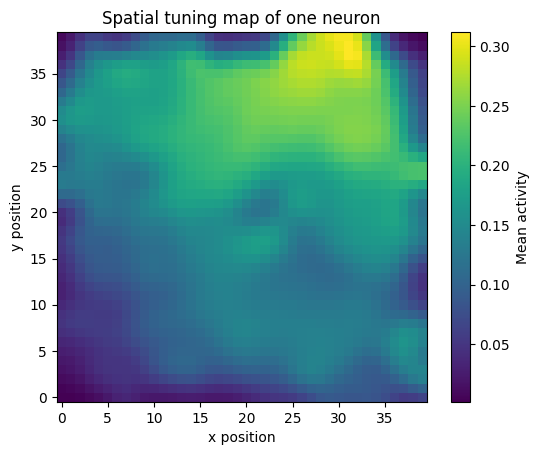

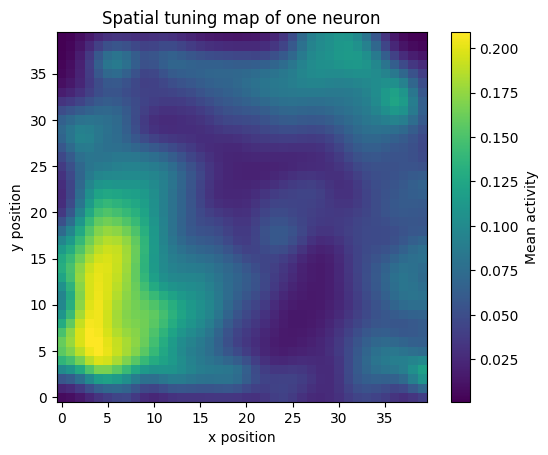

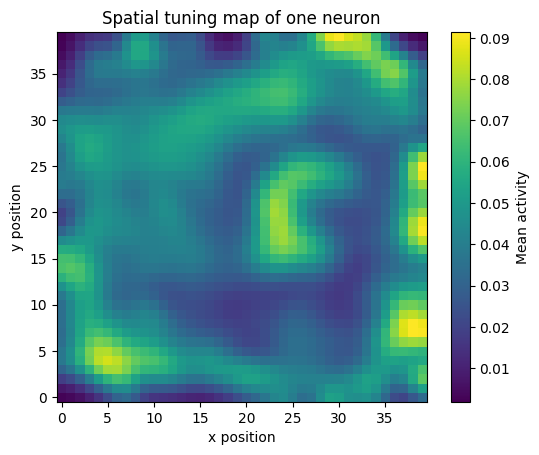

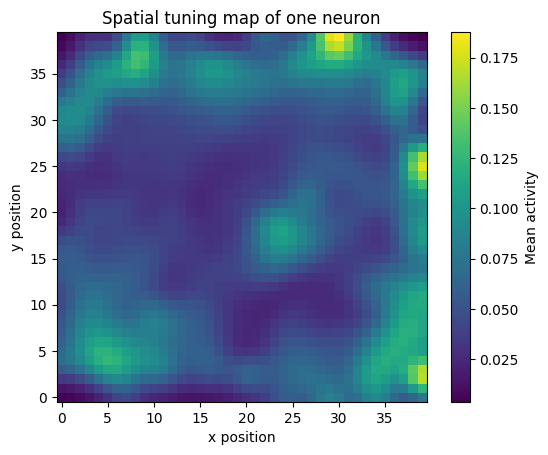

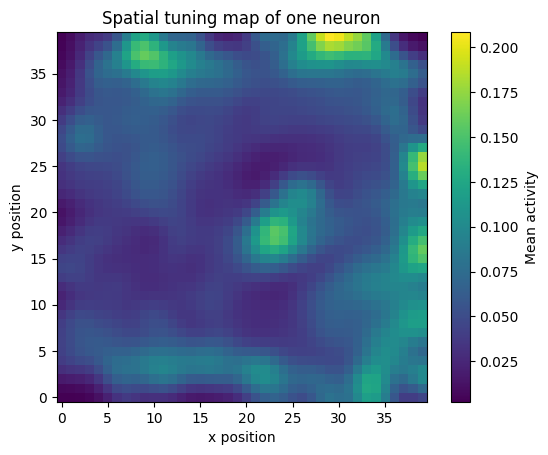

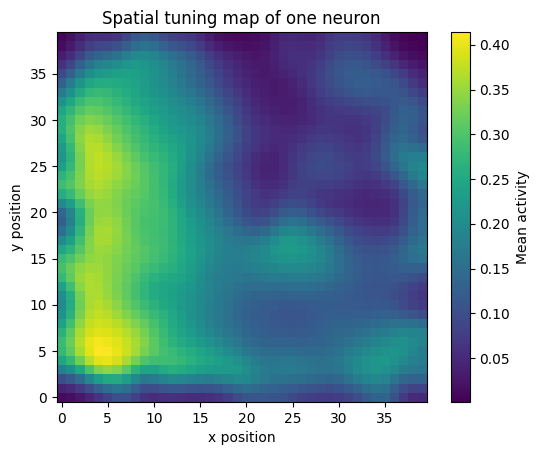

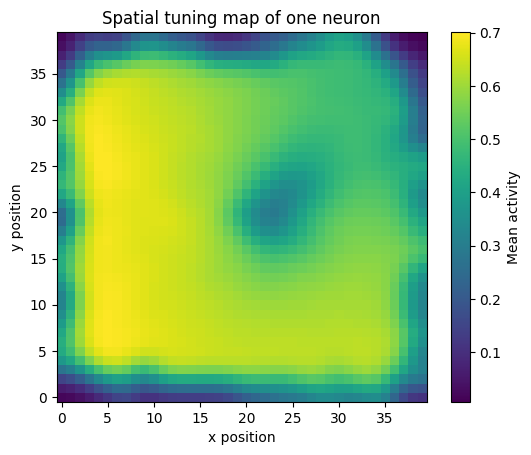

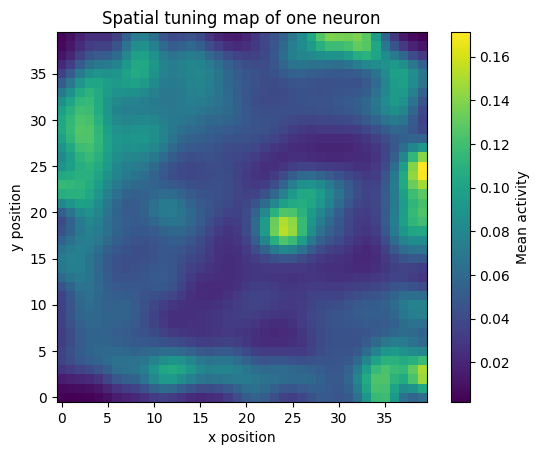

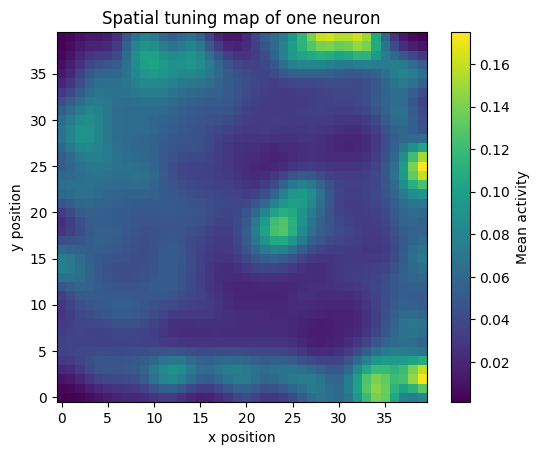

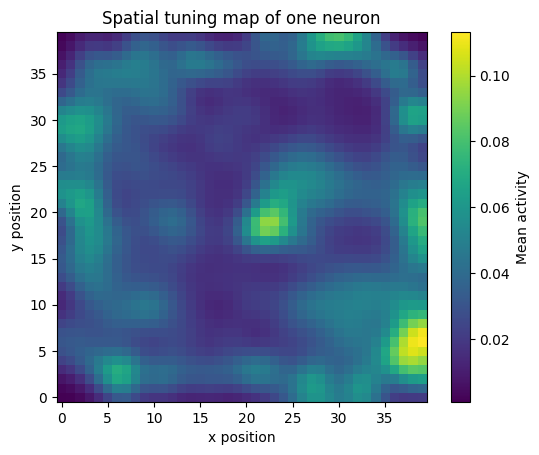

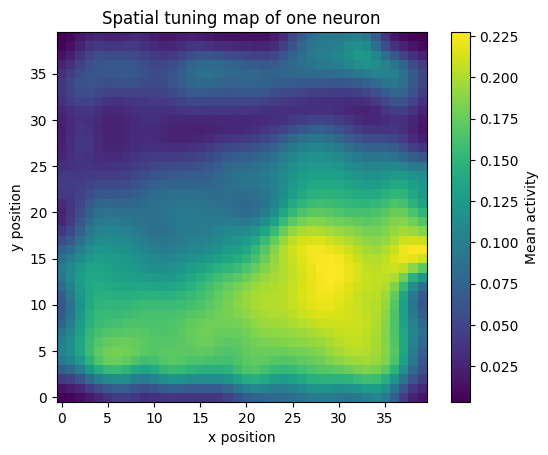

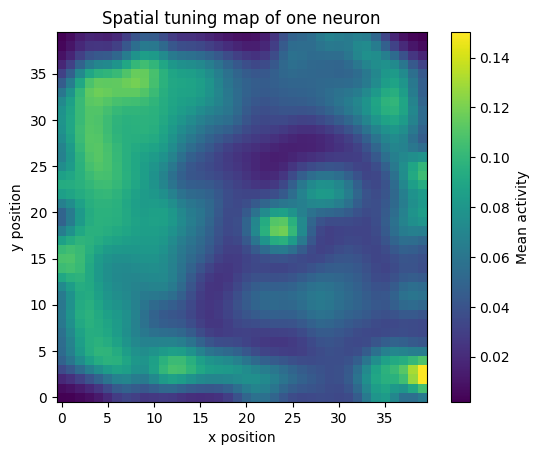

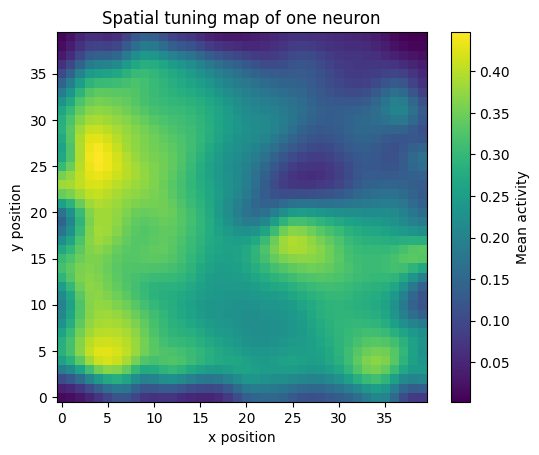

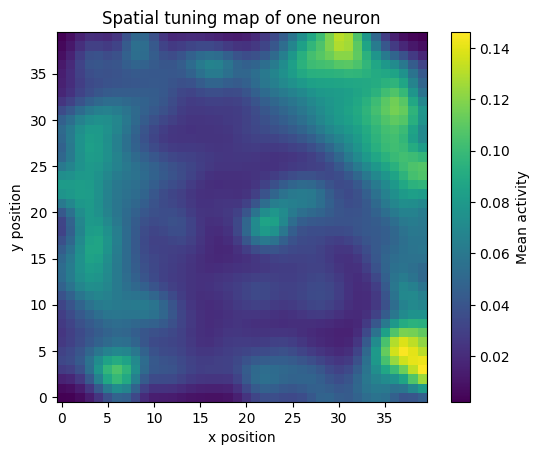

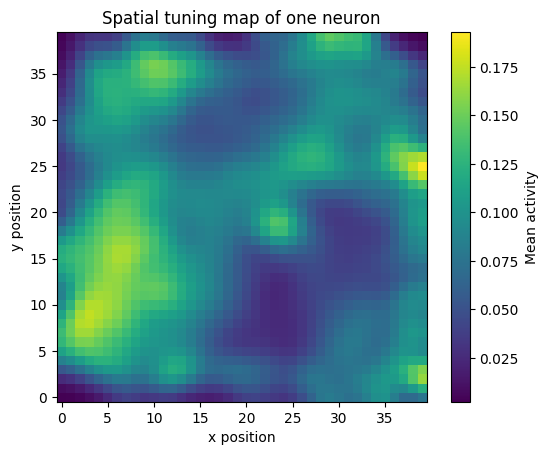

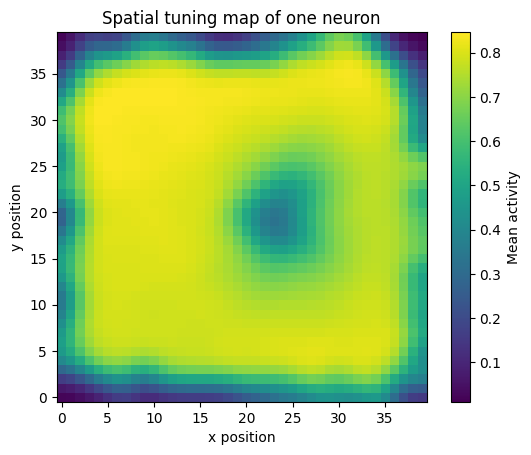

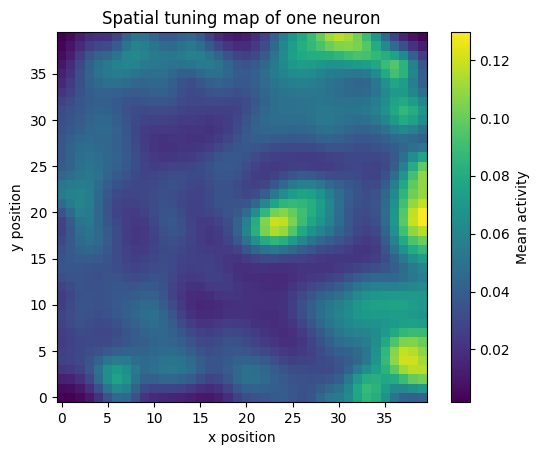

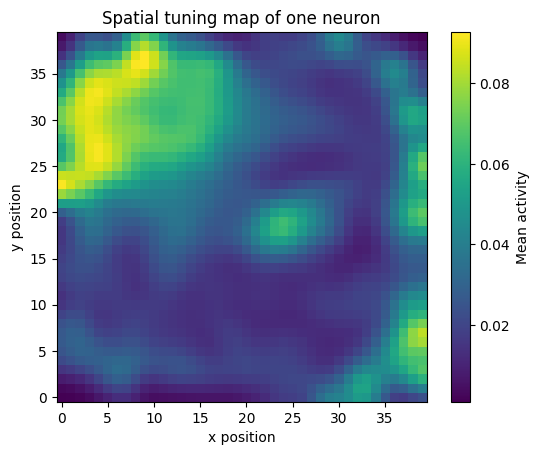

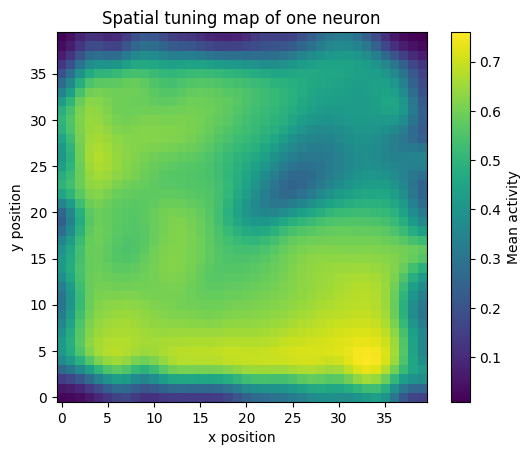

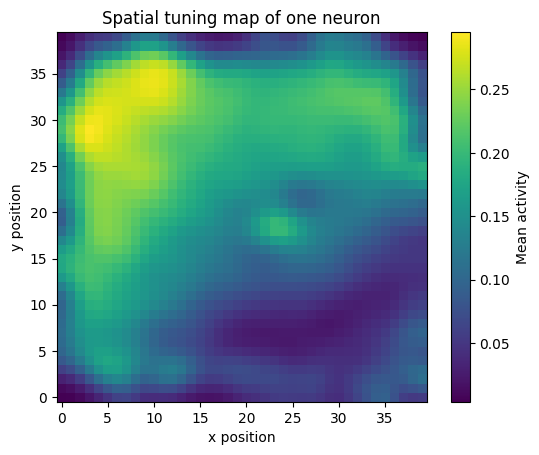

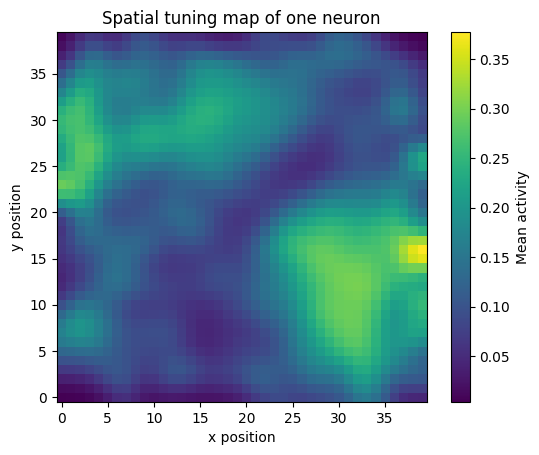

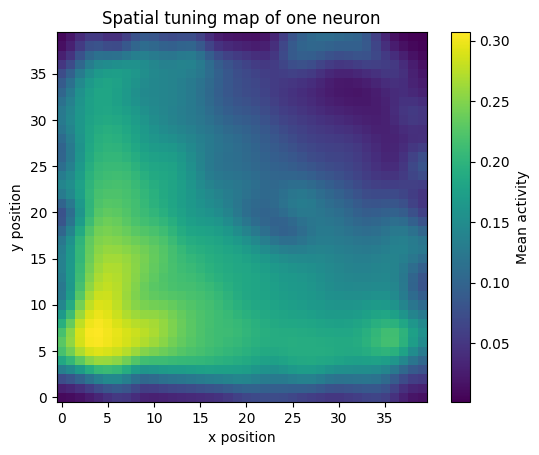

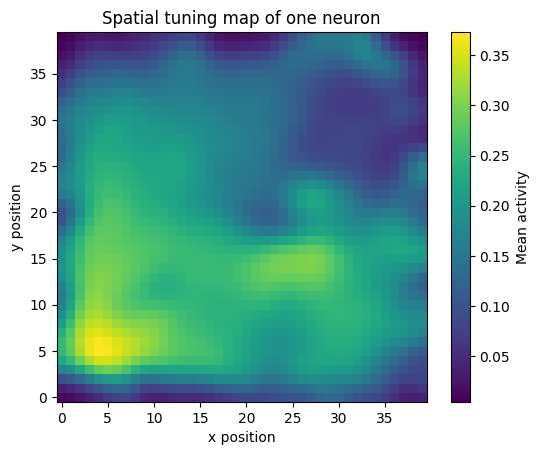

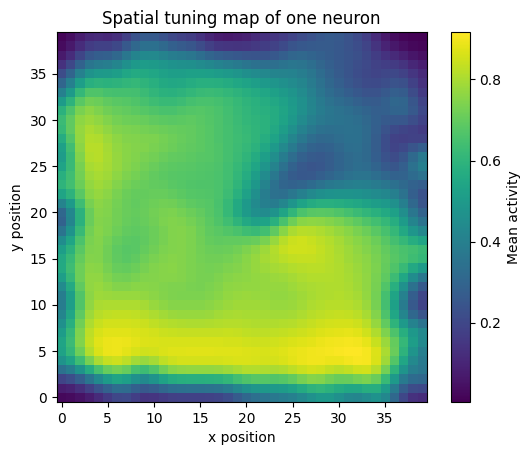

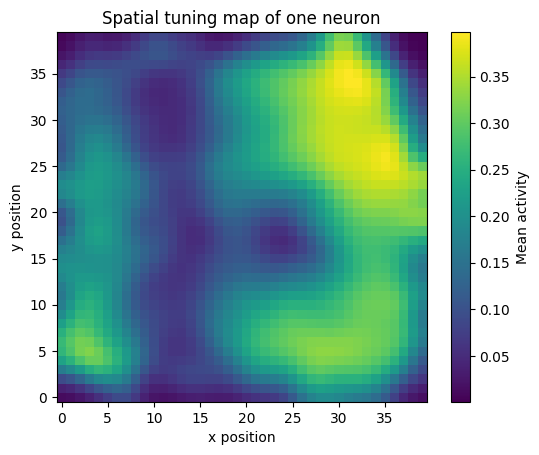

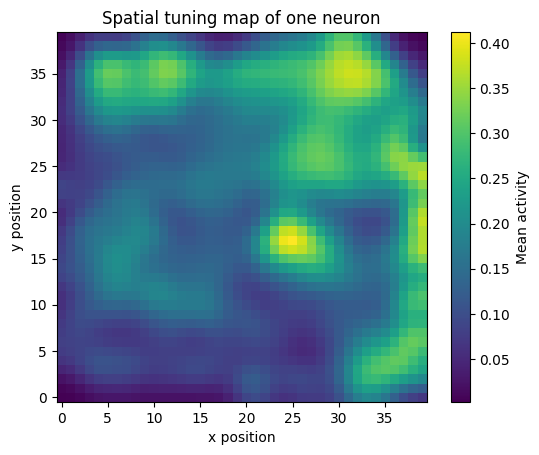

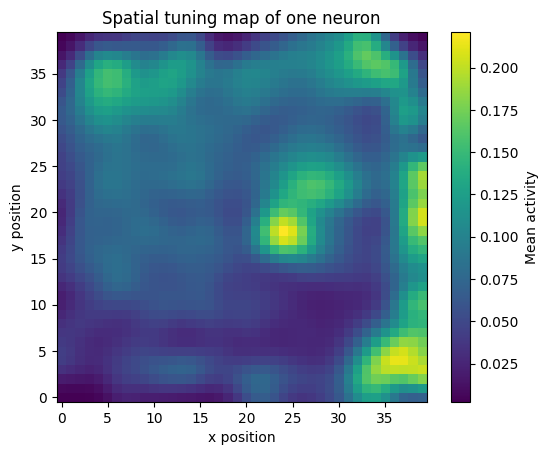

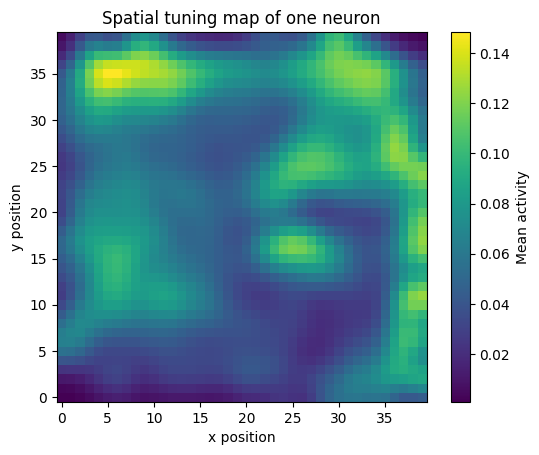

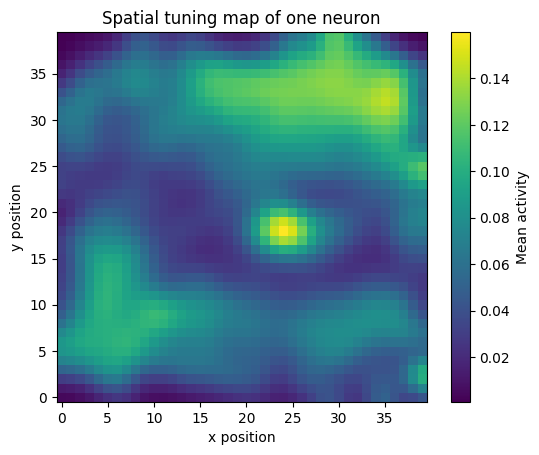

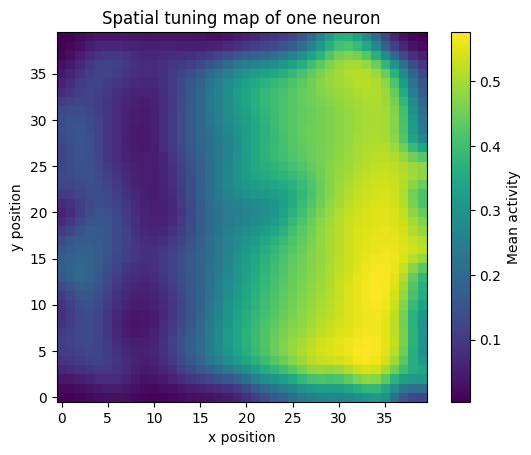

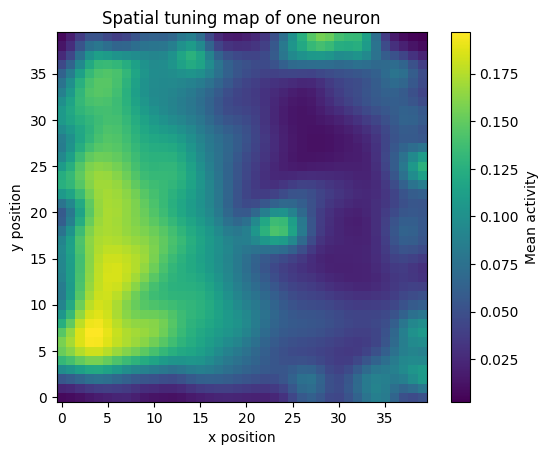

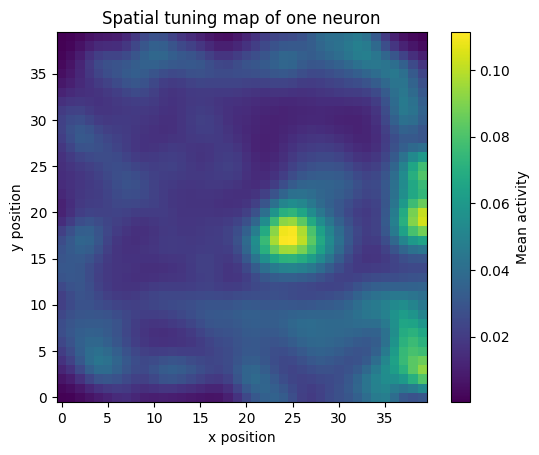

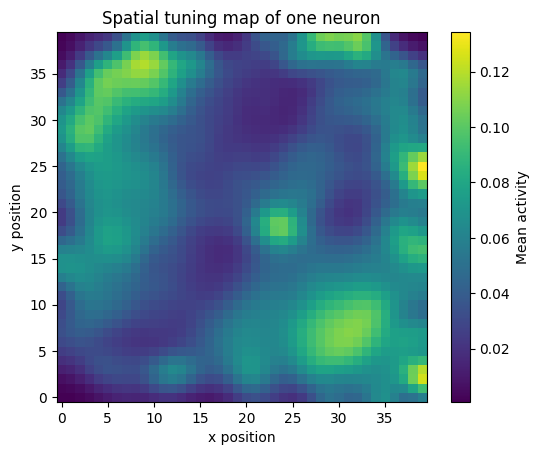

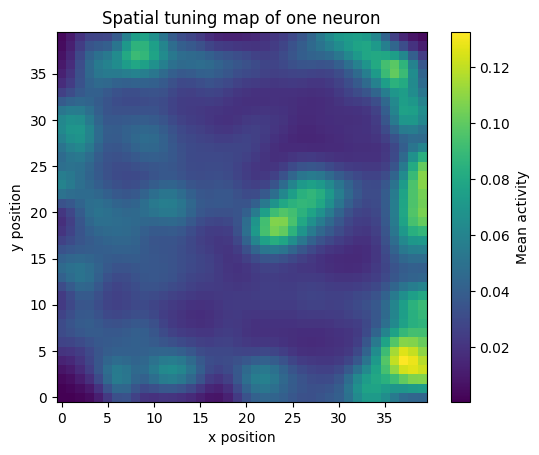

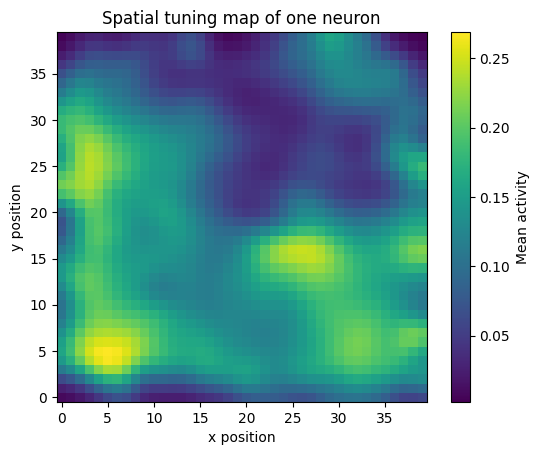

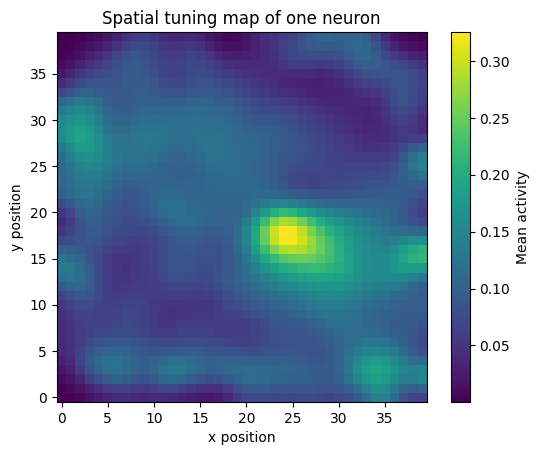

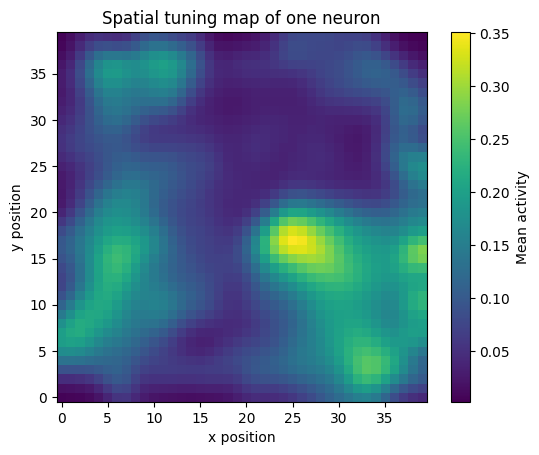

In [3]:
for i in range(visualizer.model.N):
    visualizer.plot_hist(maps[i])